<a href="https://colab.research.google.com/github/cullinap/-liblcthw/blob/master/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets  
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from torch.cuda import is_available

In [2]:
transforms = transforms.Compose(
    [ 
        transforms.ToTensor()
    ]
)

In [3]:
train = datasets.MNIST('', train = True, transform=transforms, download=True)
test = datasets.MNIST('', train = False, transform=transforms, download=True)

# split training set into 50k train set & 10k validation set
train, valid = random_split(train, [50000, 10000])
BATCH_SIZE = 100

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [4]:
trainLoader = DataLoader(train, batch_size=BATCH_SIZE)
validLoader = DataLoader(valid, batch_size=BATCH_SIZE)
testLoader = DataLoader(test, batch_size=100)

In [5]:
examples = enumerate(testLoader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

torch.Size([100, 1, 28, 28])

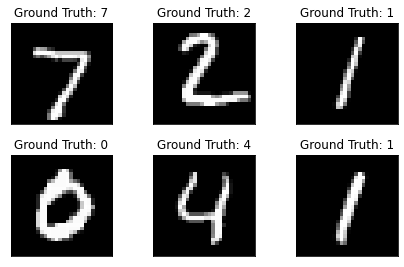

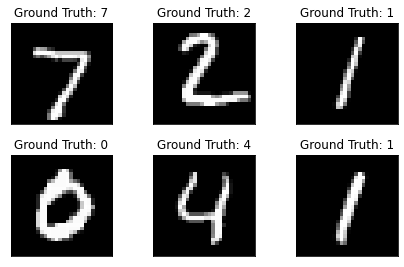

In [6]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [7]:
class SimpleNetwork(nn.Module):
  def __init__(self):
    super(SimpleNetwork, self).__init__()
    self.layer1 = nn.Linear(784, 256)
    self.layer2 = nn.Linear(256, 10)

  def forward(self, x):
    h_relu = F.relu(self.layer1(x.view(BATCH_SIZE, -1)))
    y_pred = self.layer2(h_relu)
    return y_pred


class ThreeLayer(nn.Module):
  def __init__(self):
    super(ThreeLayer, self).__init__()
    self.layer1 = nn.Linear(784, 500)
    self.layer2 = nn.Linear(500, 10)

  def forward(self, x):
    h_relu = F.relu(self.layer1(x.view(BATCH_SIZE, -1)))
    y_pred = self.layer2(h_relu)
    return y_pred

Networks

In [8]:
model = SimpleNetwork()

if torch.cuda.is_available():
    model = model.cuda()

model

SimpleNetwork(
  (layer1): Linear(in_features=784, out_features=256, bias=True)
  (layer2): Linear(in_features=256, out_features=10, bias=True)
)

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
optimizerL2 = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-5)

First attempt by just using a simple network with 10 epochs to check if the code is working and the data is in its proper form. Also this will allow me us to understand how a basic model will perform. 

100%|██████████| 500/500 [00:07<00:00, 65.71it/s]


epoch 1 
 Training Loss: 1.671081536412239
Epoch 1 
 Validation Loss 0.9883960747718811


100%|██████████| 500/500 [00:05<00:00, 98.59it/s]


epoch 2 
 Training Loss: 0.7355099559426308
Epoch 2 
 Validation Loss 0.5797502437233925


100%|██████████| 500/500 [00:07<00:00, 70.05it/s]


epoch 3 
 Training Loss: 0.5166770638823509
Epoch 3 
 Validation Loss 0.4668006807565689


100%|██████████| 500/500 [00:09<00:00, 50.63it/s]


epoch 4 
 Training Loss: 0.437781942397356
Epoch 4 
 Validation Loss 0.41499062210321425


100%|██████████| 500/500 [00:07<00:00, 70.26it/s]


epoch 5 
 Training Loss: 0.3963848594427109
Epoch 5 
 Validation Loss 0.38491621375083923


100%|██████████| 500/500 [00:06<00:00, 81.79it/s]


epoch 6 
 Training Loss: 0.3701101755797863
Epoch 6 
 Validation Loss 0.36475038409233096


100%|██████████| 500/500 [00:05<00:00, 85.91it/s]


epoch 7 
 Training Loss: 0.3513022500872612
Epoch 7 
 Validation Loss 0.34983666375279426


100%|██████████| 500/500 [00:06<00:00, 73.04it/s]


epoch 8 
 Training Loss: 0.3367171828150749
Epoch 8 
 Validation Loss 0.33801789581775665


100%|██████████| 500/500 [00:05<00:00, 90.03it/s]


epoch 9 
 Training Loss: 0.32474375987052917
Epoch 9 
 Validation Loss 0.32815357491374014


100%|██████████| 500/500 [00:07<00:00, 65.34it/s]


epoch 10 
 Training Loss: 0.3144617519676685
Epoch 10 
 Validation Loss 0.3196116304397583




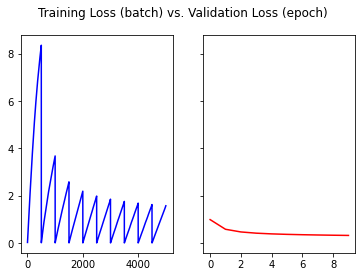

In [10]:
# 50k in train set, batch_size = 100 50k/100 = 500 iterations
n_epochs = 10

epoch_loss_capture = []
batch_loss_capture = []
valid_loss_capture = []
for e in range(n_epochs):
  train_loss = 0.0

  for data, labels in tqdm(trainLoader):
    if torch.cuda.is_available():
      data, labels = data.cuda(), labels.cuda()

    optimizer.zero_grad()
    target = model(data)
    loss = criterion(target, labels)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()
    batch_loss_capture.append(train_loss / BATCH_SIZE)

  valid_loss = 0.0
  model.eval()
  for data, labels in validLoader:
    if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
    # Forward Pass
    target = model(data)
    # Find the Loss
    loss = criterion(target,labels)
    # Calculate Loss
    valid_loss += loss.item()
  
  epoch_loss_capture.append(train_loss / len(trainLoader))
  valid_loss_capture.append(valid_loss / len(validLoader))
  print(f'epoch {e+1} \n Training Loss: {train_loss / len(trainLoader)}')
  print(f'Epoch {e+1} \n Validation Loss {valid_loss / len(validLoader)}')

print('\n')
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.suptitle('Training Loss (batch) vs. Validation Loss (epoch)')
ax1.plot(batch_loss_capture, color='blue')
ax2.plot(valid_loss_capture, color='red')

plt.show()

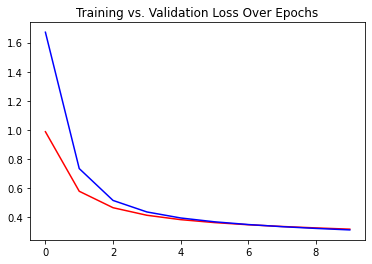

In [11]:
plt.title('Training vs. Validation Loss Over Epochs')
plt.plot(valid_loss_capture, color='red')
plt.plot(epoch_loss_capture, color='blue')
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix
import pandas as pd 
import numpy as np

def predict_val(model_name, val_data):
  model.eval()
  y_pred, y_true = [], []
  for i, (images, labels) in enumerate(val_data):
    images = images.cuda() 
    x = model(images)
    value, pred = torch.max(x, 1)
    pred = pred.data.cpu()
    y_pred.extend(list(pred.numpy()))
    y_true.extend(list(labels.numpy()))
  return np.array(y_pred), np.array(y_true)

In [15]:
y_pred, y_true = predict_val(model, testLoader)

In [16]:
diffs = y_true - y_pred

In [17]:
100 - len([v for v in diffs if v != 0])/len(diffs)*100

91.68

In [18]:
pd.DataFrame(confusion_matrix(y_true, y_pred, labels=np.arange(0, 10)))

,0,1,2,3,4,5,6,7,8,9
0,957,0,3,2,1,2,11,1,3,0
1,0,1107,2,2,0,1,4,1,18,0
2,10,7,919,15,12,1,15,12,35,6
3,4,1,22,906,0,30,2,14,20,11
4,1,2,6,1,906,0,13,2,7,44
5,12,3,6,41,9,760,17,7,29,8
6,12,3,4,1,14,10,908,1,5,0
7,3,11,29,4,8,0,0,941,2,30
8,8,8,9,21,9,20,13,9,862,15
9,11,7,4,11,41,9,1,17,6,902


With 10 epochs we achieved an accuracy score of 91.68, and the confusion matrix (above) displays the ground truth on the X-axis and the model predictions on the y-axis. Where the numbers meet (diagonally across the middle) is where there is label & prediction agreement. Otherwise we can see where a prediction of "0" was made when if fact we had another number. 

In [41]:
model = ThreeLayer()

if torch.cuda.is_available():
    model = model.cuda()

optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

Next we constructed a 3-layer model with two hiddens of 500 each and an output layer of 10

using model ThreeLayer(
  (layer1): Linear(in_features=784, out_features=500, bias=True)
  (layer2): Linear(in_features=500, out_features=10, bias=True)
) with optimizer SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
) and criterion CrossEntropyLoss() with 250 epochs




100%|██████████| 500/500 [00:04<00:00, 104.49it/s]


epoch 1 
 Training Loss: 1.5852272018194198
Epoch 1 
 Validation Loss 0.9140912878513336


100%|██████████| 500/500 [00:04<00:00, 106.59it/s]


epoch 2 
 Training Loss: 0.6939670362472534
Epoch 2 
 Validation Loss 0.5556840738654136


100%|██████████| 500/500 [00:05<00:00, 92.05it/s]


epoch 3 
 Training Loss: 0.49839529913663866
Epoch 3 
 Validation Loss 0.45263802230358124


100%|██████████| 500/500 [00:04<00:00, 103.41it/s]


epoch 4 
 Training Loss: 0.4254469205439091
Epoch 4 
 Validation Loss 0.4041967737674713


100%|██████████| 500/500 [00:04<00:00, 103.82it/s]


epoch 5 
 Training Loss: 0.386321684718132
Epoch 5 
 Validation Loss 0.37546387732028963


100%|██████████| 500/500 [00:04<00:00, 104.87it/s]


epoch 6 
 Training Loss: 0.36096503180265427
Epoch 6 
 Validation Loss 0.3557623529434204


100%|██████████| 500/500 [00:04<00:00, 105.69it/s]


epoch 7 
 Training Loss: 0.34244265300035476
Epoch 7 
 Validation Loss 0.3408714459836483


100%|██████████| 500/500 [00:04<00:00, 104.22it/s]


epoch 8 
 Training Loss: 0.327792017608881
Epoch 8 
 Validation Loss 0.32887177854776384


100%|██████████| 500/500 [00:04<00:00, 102.34it/s]


epoch 9 
 Training Loss: 0.3155657318532467
Epoch 9 
 Validation Loss 0.31870375260710715


100%|██████████| 500/500 [00:04<00:00, 105.08it/s]


epoch 10 
 Training Loss: 0.30495944944024084
Epoch 10 
 Validation Loss 0.3097828744351864


100%|██████████| 500/500 [00:04<00:00, 106.04it/s]


epoch 11 
 Training Loss: 0.295507319688797
Epoch 11 
 Validation Loss 0.3017974779009819


100%|██████████| 500/500 [00:04<00:00, 104.80it/s]


epoch 12 
 Training Loss: 0.28695328678190707
Epoch 12 
 Validation Loss 0.2945470631122589


100%|██████████| 500/500 [00:04<00:00, 107.25it/s]


epoch 13 
 Training Loss: 0.27909213362634183
Epoch 13 
 Validation Loss 0.2878443779051304


100%|██████████| 500/500 [00:04<00:00, 105.23it/s]


epoch 14 
 Training Loss: 0.2717940301299095
Epoch 14 
 Validation Loss 0.2816075944900513


100%|██████████| 500/500 [00:04<00:00, 104.41it/s]


epoch 15 
 Training Loss: 0.2649660564661026
Epoch 15 
 Validation Loss 0.27575253024697305


100%|██████████| 500/500 [00:04<00:00, 105.07it/s]


epoch 16 
 Training Loss: 0.2585323597341776
Epoch 16 
 Validation Loss 0.27018935680389405


100%|██████████| 500/500 [00:04<00:00, 105.68it/s]


epoch 17 
 Training Loss: 0.2524369774311781
Epoch 17 
 Validation Loss 0.2648885008692741


100%|██████████| 500/500 [00:04<00:00, 105.50it/s]


epoch 18 
 Training Loss: 0.24664137847721576
Epoch 18 
 Validation Loss 0.2598511487990618


100%|██████████| 500/500 [00:04<00:00, 104.38it/s]


epoch 19 
 Training Loss: 0.24112201979756356
Epoch 19 
 Validation Loss 0.25502891160547736


100%|██████████| 500/500 [00:04<00:00, 102.98it/s]


epoch 20 
 Training Loss: 0.23585817880928517
Epoch 20 
 Validation Loss 0.2504187586158514


100%|██████████| 500/500 [00:04<00:00, 104.56it/s]


epoch 21 
 Training Loss: 0.23082957054674624
Epoch 21 
 Validation Loss 0.24601235575973987


100%|██████████| 500/500 [00:04<00:00, 105.11it/s]


epoch 22 
 Training Loss: 0.22601428440213203
Epoch 22 
 Validation Loss 0.24177231296896934


100%|██████████| 500/500 [00:04<00:00, 103.45it/s]


epoch 23 
 Training Loss: 0.22138826057314873
Epoch 23 
 Validation Loss 0.23769471645355225


100%|██████████| 500/500 [00:04<00:00, 106.94it/s]


epoch 24 
 Training Loss: 0.2169405412375927
Epoch 24 
 Validation Loss 0.23376218505203725


100%|██████████| 500/500 [00:04<00:00, 105.94it/s]


epoch 25 
 Training Loss: 0.21265792125463487
Epoch 25 
 Validation Loss 0.22997090570628642


100%|██████████| 500/500 [00:05<00:00, 89.67it/s]


epoch 26 
 Training Loss: 0.20852762880921363
Epoch 26 
 Validation Loss 0.22633458025753497


100%|██████████| 500/500 [00:04<00:00, 105.30it/s]


epoch 27 
 Training Loss: 0.2045464348345995
Epoch 27 
 Validation Loss 0.22283384151756763


100%|██████████| 500/500 [00:04<00:00, 105.31it/s]


epoch 28 
 Training Loss: 0.20070469242334366
Epoch 28 
 Validation Loss 0.2194582725316286


100%|██████████| 500/500 [00:04<00:00, 103.58it/s]


epoch 29 
 Training Loss: 0.19699394644796847
Epoch 29 
 Validation Loss 0.21620531238615512


100%|██████████| 500/500 [00:04<00:00, 105.30it/s]


epoch 30 
 Training Loss: 0.19340494418889284
Epoch 30 
 Validation Loss 0.21304838858544828


100%|██████████| 500/500 [00:04<00:00, 103.93it/s]


epoch 31 
 Training Loss: 0.18992865955084562
Epoch 31 
 Validation Loss 0.2099822546541691


100%|██████████| 500/500 [00:04<00:00, 104.30it/s]


epoch 32 
 Training Loss: 0.1865553828626871
Epoch 32 
 Validation Loss 0.2069913402199745


100%|██████████| 500/500 [00:04<00:00, 105.55it/s]


epoch 33 
 Training Loss: 0.1832911471799016
Epoch 33 
 Validation Loss 0.20410388916730882


100%|██████████| 500/500 [00:04<00:00, 104.99it/s]


epoch 34 
 Training Loss: 0.18012173219025135
Epoch 34 
 Validation Loss 0.20130458824336528


100%|██████████| 500/500 [00:04<00:00, 104.92it/s]


epoch 35 
 Training Loss: 0.17704016602784395
Epoch 35 
 Validation Loss 0.19857691273093223


100%|██████████| 500/500 [00:04<00:00, 103.39it/s]


epoch 36 
 Training Loss: 0.17404523415863513
Epoch 36 
 Validation Loss 0.19592443972826004


100%|██████████| 500/500 [00:04<00:00, 104.19it/s]


epoch 37 
 Training Loss: 0.17113645686209203
Epoch 37 
 Validation Loss 0.19335815086960792


100%|██████████| 500/500 [00:04<00:00, 105.48it/s]


epoch 38 
 Training Loss: 0.16831834352016448
Epoch 38 
 Validation Loss 0.19087031684815883


100%|██████████| 500/500 [00:04<00:00, 105.41it/s]


epoch 39 
 Training Loss: 0.16558462211489677
Epoch 39 
 Validation Loss 0.18845230348408223


100%|██████████| 500/500 [00:04<00:00, 105.07it/s]


epoch 40 
 Training Loss: 0.16292430187761783
Epoch 40 
 Validation Loss 0.18609298143535852


100%|██████████| 500/500 [00:04<00:00, 104.72it/s]


epoch 41 
 Training Loss: 0.1603401660695672
Epoch 41 
 Validation Loss 0.18380312979221344


100%|██████████| 500/500 [00:04<00:00, 103.00it/s]


epoch 42 
 Training Loss: 0.15783380638808012
Epoch 42 
 Validation Loss 0.18157984085381032


100%|██████████| 500/500 [00:04<00:00, 105.32it/s]


epoch 43 
 Training Loss: 0.15540007662028074
Epoch 43 
 Validation Loss 0.17943137481808663


100%|██████████| 500/500 [00:04<00:00, 105.22it/s]


epoch 44 
 Training Loss: 0.15303499053418637
Epoch 44 
 Validation Loss 0.1773396309837699


100%|██████████| 500/500 [00:04<00:00, 105.15it/s]


epoch 45 
 Training Loss: 0.1507335609793663
Epoch 45 
 Validation Loss 0.17532694201916457


100%|██████████| 500/500 [00:04<00:00, 105.83it/s]


epoch 46 
 Training Loss: 0.1484965233951807
Epoch 46 
 Validation Loss 0.1733701431751251


100%|██████████| 500/500 [00:04<00:00, 102.20it/s]


epoch 47 
 Training Loss: 0.14631654606759548
Epoch 47 
 Validation Loss 0.17146859727799893


100%|██████████| 500/500 [00:04<00:00, 104.24it/s]


epoch 48 
 Training Loss: 0.14419417365640402
Epoch 48 
 Validation Loss 0.1696228201687336


100%|██████████| 500/500 [00:05<00:00, 89.79it/s]


epoch 49 
 Training Loss: 0.1421255673840642
Epoch 49 
 Validation Loss 0.1678358168900013


100%|██████████| 500/500 [00:04<00:00, 100.91it/s]


epoch 50 
 Training Loss: 0.1401065869256854
Epoch 50 
 Validation Loss 0.16608948189765216


100%|██████████| 500/500 [00:04<00:00, 103.42it/s]


epoch 51 
 Training Loss: 0.13813490395992994
Epoch 51 
 Validation Loss 0.16439320761710405


100%|██████████| 500/500 [00:04<00:00, 100.97it/s]


epoch 52 
 Training Loss: 0.1362123702764511
Epoch 52 
 Validation Loss 0.16274504996836187


100%|██████████| 500/500 [00:04<00:00, 105.32it/s]


epoch 53 
 Training Loss: 0.13433298528194426
Epoch 53 
 Validation Loss 0.16114033695310354


100%|██████████| 500/500 [00:04<00:00, 103.11it/s]


epoch 54 
 Training Loss: 0.13250153417885305
Epoch 54 
 Validation Loss 0.1595797100290656


100%|██████████| 500/500 [00:04<00:00, 104.75it/s]


epoch 55 
 Training Loss: 0.1307107228934765
Epoch 55 
 Validation Loss 0.15805001553148032


100%|██████████| 500/500 [00:04<00:00, 105.44it/s]


epoch 56 
 Training Loss: 0.1289613641947508
Epoch 56 
 Validation Loss 0.15656438868492842


100%|██████████| 500/500 [00:04<00:00, 105.42it/s]


epoch 57 
 Training Loss: 0.12725317542999984
Epoch 57 
 Validation Loss 0.15511501170694827


100%|██████████| 500/500 [00:04<00:00, 102.60it/s]


epoch 58 
 Training Loss: 0.12558326148986818
Epoch 58 
 Validation Loss 0.1536966970562935


100%|██████████| 500/500 [00:04<00:00, 105.41it/s]


epoch 59 
 Training Loss: 0.12394886587560176
Epoch 59 
 Validation Loss 0.15231646206229926


100%|██████████| 500/500 [00:04<00:00, 105.18it/s]


epoch 60 
 Training Loss: 0.12235150396823884
Epoch 60 
 Validation Loss 0.15096916496753693


100%|██████████| 500/500 [00:04<00:00, 105.38it/s]


epoch 61 
 Training Loss: 0.12078991317003965
Epoch 61 
 Validation Loss 0.1496534728631377


100%|██████████| 500/500 [00:04<00:00, 105.05it/s]


epoch 62 
 Training Loss: 0.11925991709530354
Epoch 62 
 Validation Loss 0.1483596494048834


100%|██████████| 500/500 [00:04<00:00, 102.05it/s]


epoch 63 
 Training Loss: 0.11776524433493614
Epoch 63 
 Validation Loss 0.14710788127034902


100%|██████████| 500/500 [00:04<00:00, 104.65it/s]


epoch 64 
 Training Loss: 0.11630434586852789
Epoch 64 
 Validation Loss 0.14588335752487183


100%|██████████| 500/500 [00:04<00:00, 103.98it/s]


epoch 65 
 Training Loss: 0.11487318307161332
Epoch 65 
 Validation Loss 0.14469254501163958


100%|██████████| 500/500 [00:04<00:00, 103.86it/s]


epoch 66 
 Training Loss: 0.11347211749106646
Epoch 66 
 Validation Loss 0.14352492839097977


100%|██████████| 500/500 [00:04<00:00, 103.91it/s]


epoch 67 
 Training Loss: 0.112099958114326
Epoch 67 
 Validation Loss 0.14237874191254377


100%|██████████| 500/500 [00:04<00:00, 104.70it/s]


epoch 68 
 Training Loss: 0.11075664641335607
Epoch 68 
 Validation Loss 0.1412566550076008


100%|██████████| 500/500 [00:04<00:00, 103.50it/s]


epoch 69 
 Training Loss: 0.10943963165953756
Epoch 69 
 Validation Loss 0.1401582183688879


100%|██████████| 500/500 [00:04<00:00, 105.08it/s]


epoch 70 
 Training Loss: 0.10814953515678644
Epoch 70 
 Validation Loss 0.13908663913607597


100%|██████████| 500/500 [00:04<00:00, 105.26it/s]


epoch 71 
 Training Loss: 0.10688382269069552
Epoch 71 
 Validation Loss 0.1380407888814807


100%|██████████| 500/500 [00:05<00:00, 89.67it/s]


epoch 72 
 Training Loss: 0.10564574436098337
Epoch 72 
 Validation Loss 0.13701256662607192


100%|██████████| 500/500 [00:04<00:00, 104.69it/s]


epoch 73 
 Training Loss: 0.10443234824389219
Epoch 73 
 Validation Loss 0.13601261977106333


100%|██████████| 500/500 [00:04<00:00, 101.72it/s]


epoch 74 
 Training Loss: 0.10324280600994826
Epoch 74 
 Validation Loss 0.13503499895334245


100%|██████████| 500/500 [00:04<00:00, 101.26it/s]


epoch 75 
 Training Loss: 0.10207609575986862
Epoch 75 
 Validation Loss 0.1340762795507908


100%|██████████| 500/500 [00:04<00:00, 104.53it/s]


epoch 76 
 Training Loss: 0.10092986429482699
Epoch 76 
 Validation Loss 0.13313754234462977


100%|██████████| 500/500 [00:04<00:00, 104.36it/s]


epoch 77 
 Training Loss: 0.09980468904599547
Epoch 77 
 Validation Loss 0.13220834262669087


100%|██████████| 500/500 [00:04<00:00, 104.77it/s]


epoch 78 
 Training Loss: 0.09870010926574468
Epoch 78 
 Validation Loss 0.13129946671426296


100%|██████████| 500/500 [00:04<00:00, 102.59it/s]


epoch 79 
 Training Loss: 0.09761425259709358
Epoch 79 
 Validation Loss 0.13041218105703592


100%|██████████| 500/500 [00:04<00:00, 103.09it/s]


epoch 80 
 Training Loss: 0.09654839733988047
Epoch 80 
 Validation Loss 0.12954633658751846


100%|██████████| 500/500 [00:04<00:00, 105.30it/s]


epoch 81 
 Training Loss: 0.0955032814592123
Epoch 81 
 Validation Loss 0.12869716746732593


100%|██████████| 500/500 [00:04<00:00, 104.70it/s]


epoch 82 
 Training Loss: 0.09447656493261457
Epoch 82 
 Validation Loss 0.12786996887996793


100%|██████████| 500/500 [00:04<00:00, 105.57it/s]


epoch 83 
 Training Loss: 0.09346805170923471
Epoch 83 
 Validation Loss 0.12705428345128894


100%|██████████| 500/500 [00:04<00:00, 105.22it/s]


epoch 84 
 Training Loss: 0.09247812578454613
Epoch 84 
 Validation Loss 0.12625404968857765


100%|██████████| 500/500 [00:04<00:00, 103.22it/s]


epoch 85 
 Training Loss: 0.09150520526990294
Epoch 85 
 Validation Loss 0.12547194626182318


100%|██████████| 500/500 [00:04<00:00, 104.69it/s]


epoch 86 
 Training Loss: 0.09055040473118424
Epoch 86 
 Validation Loss 0.12469843957573175


100%|██████████| 500/500 [00:04<00:00, 105.28it/s]


epoch 87 
 Training Loss: 0.08961032814159989
Epoch 87 
 Validation Loss 0.12394248191267251


100%|██████████| 500/500 [00:04<00:00, 104.57it/s]


epoch 88 
 Training Loss: 0.08868550549447536
Epoch 88 
 Validation Loss 0.12320775644853711


100%|██████████| 500/500 [00:04<00:00, 104.27it/s]


epoch 89 
 Training Loss: 0.08777714212611318
Epoch 89 
 Validation Loss 0.12248600464314223


100%|██████████| 500/500 [00:04<00:00, 102.69it/s]


epoch 90 
 Training Loss: 0.0868820887580514
Epoch 90 
 Validation Loss 0.12177515216171741


100%|██████████| 500/500 [00:04<00:00, 105.52it/s]


epoch 91 
 Training Loss: 0.08600117987021803
Epoch 91 
 Validation Loss 0.12107272217050195


100%|██████████| 500/500 [00:04<00:00, 104.77it/s]


epoch 92 
 Training Loss: 0.08513623691350222
Epoch 92 
 Validation Loss 0.12037587122991682


100%|██████████| 500/500 [00:04<00:00, 103.17it/s]


epoch 93 
 Training Loss: 0.08428434323519468
Epoch 93 
 Validation Loss 0.11970098666846753


100%|██████████| 500/500 [00:04<00:00, 103.50it/s]


epoch 94 
 Training Loss: 0.08344599203392863
Epoch 94 
 Validation Loss 0.119034856967628


100%|██████████| 500/500 [00:05<00:00, 89.12it/s] 


epoch 95 
 Training Loss: 0.08261977118998766
Epoch 95 
 Validation Loss 0.11838344819843769


100%|██████████| 500/500 [00:04<00:00, 102.81it/s]


epoch 96 
 Training Loss: 0.08180901906266809
Epoch 96 
 Validation Loss 0.11773950649425387


100%|██████████| 500/500 [00:04<00:00, 104.19it/s]


epoch 97 
 Training Loss: 0.08101025153324008
Epoch 97 
 Validation Loss 0.11711338544264435


100%|██████████| 500/500 [00:04<00:00, 105.28it/s]


epoch 98 
 Training Loss: 0.08022298553958535
Epoch 98 
 Validation Loss 0.11649399526417255


100%|██████████| 500/500 [00:04<00:00, 104.42it/s]


epoch 99 
 Training Loss: 0.07945022861659527
Epoch 99 
 Validation Loss 0.11588897762820125


100%|██████████| 500/500 [00:04<00:00, 104.47it/s]


epoch 100 
 Training Loss: 0.078689130730927
Epoch 100 
 Validation Loss 0.11529101150110364


100%|██████████| 500/500 [00:04<00:00, 101.66it/s]


epoch 101 
 Training Loss: 0.07793882071226835
Epoch 101 
 Validation Loss 0.11471561558544635


100%|██████████| 500/500 [00:04<00:00, 101.29it/s]


epoch 102 
 Training Loss: 0.07720264178141951
Epoch 102 
 Validation Loss 0.1141420261748135


100%|██████████| 500/500 [00:04<00:00, 102.55it/s]


epoch 103 
 Training Loss: 0.0764770891442895
Epoch 103 
 Validation Loss 0.11358306700363756


100%|██████████| 500/500 [00:04<00:00, 102.72it/s]


epoch 104 
 Training Loss: 0.07576323003694416
Epoch 104 
 Validation Loss 0.1130469325184822


100%|██████████| 500/500 [00:04<00:00, 103.02it/s]


epoch 105 
 Training Loss: 0.0750599865540862
Epoch 105 
 Validation Loss 0.11251195356249809


100%|██████████| 500/500 [00:04<00:00, 102.40it/s]


epoch 106 
 Training Loss: 0.07436693751066924
Epoch 106 
 Validation Loss 0.11198627348989248


100%|██████████| 500/500 [00:04<00:00, 104.07it/s]


epoch 107 
 Training Loss: 0.0736839859187603
Epoch 107 
 Validation Loss 0.11147078167647123


100%|██████████| 500/500 [00:04<00:00, 103.01it/s]


epoch 108 
 Training Loss: 0.07301137502305209
Epoch 108 
 Validation Loss 0.1109658844023943


100%|██████████| 500/500 [00:04<00:00, 104.06it/s]


epoch 109 
 Training Loss: 0.07234816715493798
Epoch 109 
 Validation Loss 0.11047195190563798


100%|██████████| 500/500 [00:04<00:00, 104.27it/s]


epoch 110 
 Training Loss: 0.07169469296932221
Epoch 110 
 Validation Loss 0.10998571855947376


100%|██████████| 500/500 [00:04<00:00, 103.63it/s]


epoch 111 
 Training Loss: 0.07105192293971777
Epoch 111 
 Validation Loss 0.10951133714988828


100%|██████████| 500/500 [00:04<00:00, 102.55it/s]


epoch 112 
 Training Loss: 0.07041735616140067
Epoch 112 
 Validation Loss 0.10903647415339947


100%|██████████| 500/500 [00:04<00:00, 104.64it/s]


epoch 113 
 Training Loss: 0.06979318982735276
Epoch 113 
 Validation Loss 0.10858246415853501


100%|██████████| 500/500 [00:04<00:00, 104.25it/s]


epoch 114 
 Training Loss: 0.06917746986448765
Epoch 114 
 Validation Loss 0.108135527651757


100%|██████████| 500/500 [00:04<00:00, 104.23it/s]


epoch 115 
 Training Loss: 0.068569391541183
Epoch 115 
 Validation Loss 0.10768420740962029


100%|██████████| 500/500 [00:04<00:00, 103.77it/s]


epoch 116 
 Training Loss: 0.06797126395814121
Epoch 116 
 Validation Loss 0.10725072572007775


100%|██████████| 500/500 [00:05<00:00, 97.28it/s]


epoch 117 
 Training Loss: 0.06737947001308203
Epoch 117 
 Validation Loss 0.10682892948389053


100%|██████████| 500/500 [00:04<00:00, 101.22it/s]


epoch 118 
 Training Loss: 0.06679810594953596
Epoch 118 
 Validation Loss 0.10640299661085009


100%|██████████| 500/500 [00:04<00:00, 104.34it/s]


epoch 119 
 Training Loss: 0.06622425149939955
Epoch 119 
 Validation Loss 0.10599413000047207


100%|██████████| 500/500 [00:04<00:00, 103.42it/s]


epoch 120 
 Training Loss: 0.06565611821785569
Epoch 120 
 Validation Loss 0.10558780521154404


100%|██████████| 500/500 [00:04<00:00, 103.79it/s]


epoch 121 
 Training Loss: 0.06509648810513317
Epoch 121 
 Validation Loss 0.1051846499554813


100%|██████████| 500/500 [00:04<00:00, 103.02it/s]


epoch 122 
 Training Loss: 0.06454562888666987
Epoch 122 
 Validation Loss 0.10479011431336403


100%|██████████| 500/500 [00:04<00:00, 102.89it/s]


epoch 123 
 Training Loss: 0.06400028669089079
Epoch 123 
 Validation Loss 0.10441066207364201


100%|██████████| 500/500 [00:04<00:00, 101.68it/s]


epoch 124 
 Training Loss: 0.06346248406916857
Epoch 124 
 Validation Loss 0.10402580987662077


100%|██████████| 500/500 [00:04<00:00, 103.32it/s]


epoch 125 
 Training Loss: 0.06293205728754402
Epoch 125 
 Validation Loss 0.10365667562931775


100%|██████████| 500/500 [00:04<00:00, 102.07it/s]


epoch 126 
 Training Loss: 0.062409423191100356
Epoch 126 
 Validation Loss 0.10328904630616308


100%|██████████| 500/500 [00:04<00:00, 103.36it/s]


epoch 127 
 Training Loss: 0.06189212485402822
Epoch 127 
 Validation Loss 0.10292717557400465


100%|██████████| 500/500 [00:04<00:00, 100.12it/s]


epoch 128 
 Training Loss: 0.06138184750266373
Epoch 128 
 Validation Loss 0.10257272316142917


100%|██████████| 500/500 [00:04<00:00, 103.24it/s]


epoch 129 
 Training Loss: 0.060877195885404946
Epoch 129 
 Validation Loss 0.10222803669050336


100%|██████████| 500/500 [00:04<00:00, 101.97it/s]


epoch 130 
 Training Loss: 0.06037987771071494
Epoch 130 
 Validation Loss 0.1018896514363587


100%|██████████| 500/500 [00:04<00:00, 102.90it/s]


epoch 131 
 Training Loss: 0.059887376856058834
Epoch 131 
 Validation Loss 0.10155286747962236


100%|██████████| 500/500 [00:04<00:00, 103.54it/s]


epoch 132 
 Training Loss: 0.059402554228901866
Epoch 132 
 Validation Loss 0.10122246930375695


100%|██████████| 500/500 [00:04<00:00, 101.57it/s]


epoch 133 
 Training Loss: 0.05892248909920454
Epoch 133 
 Validation Loss 0.10089974349364639


100%|██████████| 500/500 [00:04<00:00, 103.66it/s]


epoch 134 
 Training Loss: 0.05845014181360603
Epoch 134 
 Validation Loss 0.10057876532897353


100%|██████████| 500/500 [00:04<00:00, 102.80it/s]


epoch 135 
 Training Loss: 0.05798256152309477
Epoch 135 
 Validation Loss 0.10027032466605305


100%|██████████| 500/500 [00:04<00:00, 102.18it/s]


epoch 136 
 Training Loss: 0.05752027725428343
Epoch 136 
 Validation Loss 0.09995977899059653


100%|██████████| 500/500 [00:04<00:00, 102.12it/s]


epoch 137 
 Training Loss: 0.05706526176072657
Epoch 137 
 Validation Loss 0.09966198910027742


100%|██████████| 500/500 [00:04<00:00, 102.73it/s]


epoch 138 
 Training Loss: 0.056614354338496924
Epoch 138 
 Validation Loss 0.09935552809387445


100%|██████████| 500/500 [00:04<00:00, 104.13it/s]


epoch 139 
 Training Loss: 0.056169223910197616
Epoch 139 
 Validation Loss 0.09907017569988966


100%|██████████| 500/500 [00:05<00:00, 90.81it/s] 


epoch 140 
 Training Loss: 0.05572933520562947
Epoch 140 
 Validation Loss 0.09878226324915886


100%|██████████| 500/500 [00:04<00:00, 104.03it/s]


epoch 141 
 Training Loss: 0.05529412889480591
Epoch 141 
 Validation Loss 0.09849690120667219


100%|██████████| 500/500 [00:04<00:00, 103.35it/s]


epoch 142 
 Training Loss: 0.05486431014165282
Epoch 142 
 Validation Loss 0.09821178430691362


100%|██████████| 500/500 [00:04<00:00, 104.38it/s]


epoch 143 
 Training Loss: 0.05443839612416923
Epoch 143 
 Validation Loss 0.097946897726506


100%|██████████| 500/500 [00:04<00:00, 103.41it/s]


epoch 144 
 Training Loss: 0.054020173164084556
Epoch 144 
 Validation Loss 0.0976689251884818


100%|██████████| 500/500 [00:04<00:00, 104.38it/s]


epoch 145 
 Training Loss: 0.053603275049477817
Epoch 145 
 Validation Loss 0.09740124136209488


100%|██████████| 500/500 [00:04<00:00, 103.27it/s]


epoch 146 
 Training Loss: 0.05319367769546807
Epoch 146 
 Validation Loss 0.09714128464460373


100%|██████████| 500/500 [00:04<00:00, 103.98it/s]


epoch 147 
 Training Loss: 0.05278691466338933
Epoch 147 
 Validation Loss 0.09688523123040796


100%|██████████| 500/500 [00:04<00:00, 103.41it/s]


epoch 148 
 Training Loss: 0.05238667261041701
Epoch 148 
 Validation Loss 0.09663035690784455


100%|██████████| 500/500 [00:04<00:00, 101.80it/s]


epoch 149 
 Training Loss: 0.051989227456972
Epoch 149 
 Validation Loss 0.09639130920171737


100%|██████████| 500/500 [00:04<00:00, 102.62it/s]


epoch 150 
 Training Loss: 0.05159858146682381
Epoch 150 
 Validation Loss 0.09614467810839415


100%|██████████| 500/500 [00:04<00:00, 103.65it/s]


epoch 151 
 Training Loss: 0.051211153404787185
Epoch 151 
 Validation Loss 0.09590042905882001


100%|██████████| 500/500 [00:04<00:00, 104.32it/s]


epoch 152 
 Training Loss: 0.05082869696989655
Epoch 152 
 Validation Loss 0.09566413944587111


100%|██████████| 500/500 [00:04<00:00, 103.98it/s]


epoch 153 
 Training Loss: 0.05044966983795166
Epoch 153 
 Validation Loss 0.09543596951290965


100%|██████████| 500/500 [00:04<00:00, 101.90it/s]


epoch 154 
 Training Loss: 0.0500756407417357
Epoch 154 
 Validation Loss 0.09519927507266403


100%|██████████| 500/500 [00:04<00:00, 103.98it/s]


epoch 155 
 Training Loss: 0.04970497900806367
Epoch 155 
 Validation Loss 0.09497443409636616


100%|██████████| 500/500 [00:04<00:00, 105.38it/s]


epoch 156 
 Training Loss: 0.049338853722438215
Epoch 156 
 Validation Loss 0.09475391561165453


100%|██████████| 500/500 [00:04<00:00, 102.13it/s]


epoch 157 
 Training Loss: 0.048975171132013204
Epoch 157 
 Validation Loss 0.09453731724992394


100%|██████████| 500/500 [00:04<00:00, 101.37it/s]


epoch 158 
 Training Loss: 0.04861696142144501
Epoch 158 
 Validation Loss 0.09430964352563023


100%|██████████| 500/500 [00:04<00:00, 100.21it/s]


epoch 159 
 Training Loss: 0.04826132160238922
Epoch 159 
 Validation Loss 0.0941017585620284


100%|██████████| 500/500 [00:04<00:00, 102.61it/s]


epoch 160 
 Training Loss: 0.04791053755581379
Epoch 160 
 Validation Loss 0.09388651752844453


100%|██████████| 500/500 [00:04<00:00, 104.14it/s]


epoch 161 
 Training Loss: 0.04756193401478231
Epoch 161 
 Validation Loss 0.09368763605132699


100%|██████████| 500/500 [00:05<00:00, 96.38it/s]


epoch 162 
 Training Loss: 0.047218348402529954
Epoch 162 
 Validation Loss 0.09347608648240566


100%|██████████| 500/500 [00:04<00:00, 102.11it/s]


epoch 163 
 Training Loss: 0.046875317804515364
Epoch 163 
 Validation Loss 0.09327484356239438


100%|██████████| 500/500 [00:04<00:00, 102.46it/s]


epoch 164 
 Training Loss: 0.04653879801370203
Epoch 164 
 Validation Loss 0.093070556987077


100%|██████████| 500/500 [00:04<00:00, 100.98it/s]


epoch 165 
 Training Loss: 0.04620335033442825
Epoch 165 
 Validation Loss 0.09287148520350456


100%|██████████| 500/500 [00:04<00:00, 102.97it/s]


epoch 166 
 Training Loss: 0.0458738702069968
Epoch 166 
 Validation Loss 0.09267744099721313


100%|██████████| 500/500 [00:04<00:00, 103.70it/s]


epoch 167 
 Training Loss: 0.04554603837057948
Epoch 167 
 Validation Loss 0.09248545018956066


100%|██████████| 500/500 [00:04<00:00, 103.36it/s]


epoch 168 
 Training Loss: 0.04522210283856839
Epoch 168 
 Validation Loss 0.09230002356693148


100%|██████████| 500/500 [00:04<00:00, 101.66it/s]


epoch 169 
 Training Loss: 0.04490118640474975
Epoch 169 
 Validation Loss 0.09211684215813876


100%|██████████| 500/500 [00:05<00:00, 98.85it/s] 


epoch 170 
 Training Loss: 0.0445855506118387
Epoch 170 
 Validation Loss 0.09193225402384997


100%|██████████| 500/500 [00:04<00:00, 102.82it/s]


epoch 171 
 Training Loss: 0.0442698293523863
Epoch 171 
 Validation Loss 0.09175044342875481


100%|██████████| 500/500 [00:04<00:00, 104.46it/s]


epoch 172 
 Training Loss: 0.04396058608777821
Epoch 172 
 Validation Loss 0.09157626638188958


100%|██████████| 500/500 [00:04<00:00, 104.52it/s]


epoch 173 
 Training Loss: 0.043652782019227745
Epoch 173 
 Validation Loss 0.09139845551922918


100%|██████████| 500/500 [00:04<00:00, 103.24it/s]


epoch 174 
 Training Loss: 0.04334825644921511
Epoch 174 
 Validation Loss 0.09122735923156142


100%|██████████| 500/500 [00:04<00:00, 102.93it/s]


epoch 175 
 Training Loss: 0.04304854378383607
Epoch 175 
 Validation Loss 0.0910552497766912


100%|██████████| 500/500 [00:04<00:00, 103.99it/s]


epoch 176 
 Training Loss: 0.04275161050539464
Epoch 176 
 Validation Loss 0.09088584512472153


100%|██████████| 500/500 [00:04<00:00, 104.05it/s]


epoch 177 
 Training Loss: 0.04245501007884741
Epoch 177 
 Validation Loss 0.09072837345302105


100%|██████████| 500/500 [00:04<00:00, 103.51it/s]


epoch 178 
 Training Loss: 0.04216224146541208
Epoch 178 
 Validation Loss 0.09055837493389846


100%|██████████| 500/500 [00:04<00:00, 103.40it/s]


epoch 179 
 Training Loss: 0.04187271211668849
Epoch 179 
 Validation Loss 0.0904006076976657


100%|██████████| 500/500 [00:04<00:00, 101.25it/s]


epoch 180 
 Training Loss: 0.04158617990184575
Epoch 180 
 Validation Loss 0.09024539409205318


100%|██████████| 500/500 [00:04<00:00, 102.72it/s]


epoch 181 
 Training Loss: 0.04130293875094503
Epoch 181 
 Validation Loss 0.09008986001834274


100%|██████████| 500/500 [00:04<00:00, 104.89it/s]


epoch 182 
 Training Loss: 0.0410206265617162
Epoch 182 
 Validation Loss 0.08993969710543752


100%|██████████| 500/500 [00:04<00:00, 102.65it/s]


epoch 183 
 Training Loss: 0.04074283199943602
Epoch 183 
 Validation Loss 0.08978462932631373


100%|██████████| 500/500 [00:04<00:00, 102.00it/s]


epoch 184 
 Training Loss: 0.040466814001090826
Epoch 184 
 Validation Loss 0.08963503452017903


100%|██████████| 500/500 [00:05<00:00, 89.80it/s] 


epoch 185 
 Training Loss: 0.04019354706350714
Epoch 185 
 Validation Loss 0.08949183704331518


100%|██████████| 500/500 [00:04<00:00, 103.51it/s]


epoch 186 
 Training Loss: 0.03992250961344689
Epoch 186 
 Validation Loss 0.08935146251693368


100%|██████████| 500/500 [00:04<00:00, 102.84it/s]


epoch 187 
 Training Loss: 0.03965492993872613
Epoch 187 
 Validation Loss 0.08920203056186438


100%|██████████| 500/500 [00:04<00:00, 103.55it/s]


epoch 188 
 Training Loss: 0.03938859039917588
Epoch 188 
 Validation Loss 0.08906175339594484


100%|██████████| 500/500 [00:04<00:00, 101.71it/s]


epoch 189 
 Training Loss: 0.03912633507698774
Epoch 189 
 Validation Loss 0.08892819637432695


100%|██████████| 500/500 [00:04<00:00, 103.51it/s]


epoch 190 
 Training Loss: 0.03886509325820953
Epoch 190 
 Validation Loss 0.08879075048491358


100%|██████████| 500/500 [00:04<00:00, 104.38it/s]


epoch 191 
 Training Loss: 0.03860562853515148
Epoch 191 
 Validation Loss 0.08865694483742118


100%|██████████| 500/500 [00:04<00:00, 101.69it/s]


epoch 192 
 Training Loss: 0.03834962719492614
Epoch 192 
 Validation Loss 0.0885335585847497


100%|██████████| 500/500 [00:04<00:00, 102.98it/s]


epoch 193 
 Training Loss: 0.03809551592171192
Epoch 193 
 Validation Loss 0.0883968517743051


100%|██████████| 500/500 [00:04<00:00, 102.59it/s]


epoch 194 
 Training Loss: 0.037843587159179154
Epoch 194 
 Validation Loss 0.08827263917773961


100%|██████████| 500/500 [00:04<00:00, 102.90it/s]


epoch 195 
 Training Loss: 0.037594643772579726
Epoch 195 
 Validation Loss 0.08815017875283956


100%|██████████| 500/500 [00:04<00:00, 104.20it/s]


epoch 196 
 Training Loss: 0.037347913617268205
Epoch 196 
 Validation Loss 0.08802356438711285


100%|██████████| 500/500 [00:04<00:00, 101.80it/s]


epoch 197 
 Training Loss: 0.03710161504708231
Epoch 197 
 Validation Loss 0.08790571749210357


100%|██████████| 500/500 [00:04<00:00, 102.67it/s]


epoch 198 
 Training Loss: 0.036859172765165565
Epoch 198 
 Validation Loss 0.08778058126568794


100%|██████████| 500/500 [00:04<00:00, 102.91it/s]


epoch 199 
 Training Loss: 0.036619505671784285
Epoch 199 
 Validation Loss 0.08765666715800763


100%|██████████| 500/500 [00:04<00:00, 101.99it/s]


epoch 200 
 Training Loss: 0.036380324501544235
Epoch 200 
 Validation Loss 0.08754882154986263


100%|██████████| 500/500 [00:04<00:00, 101.52it/s]


epoch 201 
 Training Loss: 0.03614364383928478
Epoch 201 
 Validation Loss 0.08742613159120083


100%|██████████| 500/500 [00:04<00:00, 101.50it/s]


epoch 202 
 Training Loss: 0.035908853293396534
Epoch 202 
 Validation Loss 0.08731449533253909


100%|██████████| 500/500 [00:04<00:00, 103.25it/s]


epoch 203 
 Training Loss: 0.03567698982078582
Epoch 203 
 Validation Loss 0.08720070408657193


100%|██████████| 500/500 [00:04<00:00, 102.99it/s]


epoch 204 
 Training Loss: 0.035445333320647476
Epoch 204 
 Validation Loss 0.087090372312814


100%|██████████| 500/500 [00:04<00:00, 102.83it/s]


epoch 205 
 Training Loss: 0.0352169801350683
Epoch 205 
 Validation Loss 0.0869816249795258


100%|██████████| 500/500 [00:04<00:00, 102.90it/s]


epoch 206 
 Training Loss: 0.03499065503757447
Epoch 206 
 Validation Loss 0.08687239183112978


100%|██████████| 500/500 [00:05<00:00, 90.45it/s]


epoch 207 
 Training Loss: 0.034767021851614115
Epoch 207 
 Validation Loss 0.08676272794604302


100%|██████████| 500/500 [00:04<00:00, 101.41it/s]


epoch 208 
 Training Loss: 0.03454516695905477
Epoch 208 
 Validation Loss 0.08666291069239378


100%|██████████| 500/500 [00:04<00:00, 102.52it/s]


epoch 209 
 Training Loss: 0.034324221891351044
Epoch 209 
 Validation Loss 0.08655389183200896


100%|██████████| 500/500 [00:04<00:00, 101.61it/s]


epoch 210 
 Training Loss: 0.03410629305802286
Epoch 210 
 Validation Loss 0.08645545104518533


100%|██████████| 500/500 [00:04<00:00, 101.84it/s]


epoch 211 
 Training Loss: 0.033890100150369105
Epoch 211 
 Validation Loss 0.0863512493018061


100%|██████████| 500/500 [00:04<00:00, 102.17it/s]


epoch 212 
 Training Loss: 0.03367458515334874
Epoch 212 
 Validation Loss 0.08625566481612623


100%|██████████| 500/500 [00:05<00:00, 98.90it/s] 


epoch 213 
 Training Loss: 0.0334631431736052
Epoch 213 
 Validation Loss 0.08615561865270138


100%|██████████| 500/500 [00:04<00:00, 103.33it/s]


epoch 214 
 Training Loss: 0.033251477834768596
Epoch 214 
 Validation Loss 0.08606394020840526


100%|██████████| 500/500 [00:04<00:00, 101.24it/s]


epoch 215 
 Training Loss: 0.03304364674631506
Epoch 215 
 Validation Loss 0.08596581757068635


100%|██████████| 500/500 [00:04<00:00, 103.60it/s]


epoch 216 
 Training Loss: 0.032836208073422316
Epoch 216 
 Validation Loss 0.08587282042019069


100%|██████████| 500/500 [00:04<00:00, 101.94it/s]


epoch 217 
 Training Loss: 0.03263145379815251
Epoch 217 
 Validation Loss 0.08578662417829036


100%|██████████| 500/500 [00:04<00:00, 102.18it/s]


epoch 218 
 Training Loss: 0.03242746799066663
Epoch 218 
 Validation Loss 0.08569714942015708


100%|██████████| 500/500 [00:04<00:00, 102.67it/s]


epoch 219 
 Training Loss: 0.03222556512616575
Epoch 219 
 Validation Loss 0.08560039028525353


100%|██████████| 500/500 [00:04<00:00, 102.01it/s]


epoch 220 
 Training Loss: 0.032025779097341
Epoch 220 
 Validation Loss 0.08552329200319946


100%|██████████| 500/500 [00:04<00:00, 101.48it/s]


epoch 221 
 Training Loss: 0.031827478400431576
Epoch 221 
 Validation Loss 0.085439407331869


100%|██████████| 500/500 [00:04<00:00, 101.78it/s]


epoch 222 
 Training Loss: 0.03163093665335327
Epoch 222 
 Validation Loss 0.085349579481408


100%|██████████| 500/500 [00:04<00:00, 103.99it/s]


epoch 223 
 Training Loss: 0.03143472068011761
Epoch 223 
 Validation Loss 0.08527049271389842


100%|██████████| 500/500 [00:04<00:00, 102.65it/s]


epoch 224 
 Training Loss: 0.031243377472274004
Epoch 224 
 Validation Loss 0.08518574113957583


100%|██████████| 500/500 [00:04<00:00, 103.20it/s]


epoch 225 
 Training Loss: 0.031050650021992622
Epoch 225 
 Validation Loss 0.08510013106279075


100%|██████████| 500/500 [00:04<00:00, 101.79it/s]


epoch 226 
 Training Loss: 0.030859850200824438
Epoch 226 
 Validation Loss 0.08502431026659905


100%|██████████| 500/500 [00:04<00:00, 103.11it/s]


epoch 227 
 Training Loss: 0.03067130443174392
Epoch 227 
 Validation Loss 0.0849406423792243


100%|██████████| 500/500 [00:04<00:00, 103.35it/s]


epoch 228 
 Training Loss: 0.030484647455625236
Epoch 228 
 Validation Loss 0.08486720671877265


100%|██████████| 500/500 [00:04<00:00, 100.21it/s]


epoch 229 
 Training Loss: 0.030299356766045095
Epoch 229 
 Validation Loss 0.08478740121237933


100%|██████████| 500/500 [00:05<00:00, 93.12it/s] 


epoch 230 
 Training Loss: 0.030115317238494754
Epoch 230 
 Validation Loss 0.08471961668692529


100%|██████████| 500/500 [00:04<00:00, 102.38it/s]


epoch 231 
 Training Loss: 0.029933520022779703
Epoch 231 
 Validation Loss 0.084639938948676


100%|██████████| 500/500 [00:04<00:00, 102.49it/s]


epoch 232 
 Training Loss: 0.0297523375460878
Epoch 232 
 Validation Loss 0.08457394327037036


100%|██████████| 500/500 [00:04<00:00, 103.26it/s]


epoch 233 
 Training Loss: 0.02957291561830789
Epoch 233 
 Validation Loss 0.08449737773276865


100%|██████████| 500/500 [00:04<00:00, 103.53it/s]


epoch 234 
 Training Loss: 0.029395840637385845
Epoch 234 
 Validation Loss 0.08443200150504708


100%|██████████| 500/500 [00:04<00:00, 103.54it/s]


epoch 235 
 Training Loss: 0.029218949280679227
Epoch 235 
 Validation Loss 0.08435679596848786


100%|██████████| 500/500 [00:04<00:00, 102.21it/s]


epoch 236 
 Training Loss: 0.02904430198483169
Epoch 236 
 Validation Loss 0.08429119273088873


100%|██████████| 500/500 [00:04<00:00, 104.39it/s]


epoch 237 
 Training Loss: 0.02887119625136256
Epoch 237 
 Validation Loss 0.08421933954581619


100%|██████████| 500/500 [00:04<00:00, 103.61it/s]


epoch 238 
 Training Loss: 0.028698513872921466
Epoch 238 
 Validation Loss 0.08416610319167375


100%|██████████| 500/500 [00:04<00:00, 103.49it/s]


epoch 239 
 Training Loss: 0.02852901657205075
Epoch 239 
 Validation Loss 0.08409199346788228


100%|██████████| 500/500 [00:04<00:00, 104.85it/s]


epoch 240 
 Training Loss: 0.028360161603428424
Epoch 240 
 Validation Loss 0.08402020172215999


100%|██████████| 500/500 [00:04<00:00, 104.97it/s]


epoch 241 
 Training Loss: 0.028192036265507342
Epoch 241 
 Validation Loss 0.08396086406894028


100%|██████████| 500/500 [00:04<00:00, 104.31it/s]


epoch 242 
 Training Loss: 0.02802627253625542
Epoch 242 
 Validation Loss 0.0838909103628248


100%|██████████| 500/500 [00:04<00:00, 100.89it/s]


epoch 243 
 Training Loss: 0.027860737846232952
Epoch 243 
 Validation Loss 0.08383542340248823


100%|██████████| 500/500 [00:04<00:00, 104.68it/s]


epoch 244 
 Training Loss: 0.02769764213077724
Epoch 244 
 Validation Loss 0.08376807691529393


100%|██████████| 500/500 [00:04<00:00, 100.30it/s]


epoch 245 
 Training Loss: 0.027534335284493863
Epoch 245 
 Validation Loss 0.08370860174298286


100%|██████████| 500/500 [00:04<00:00, 104.31it/s]


epoch 246 
 Training Loss: 0.027374877527356147
Epoch 246 
 Validation Loss 0.08364354537799955


100%|██████████| 500/500 [00:04<00:00, 102.41it/s]


epoch 247 
 Training Loss: 0.02721438801754266
Epoch 247 
 Validation Loss 0.08358627985231579


100%|██████████| 500/500 [00:04<00:00, 103.46it/s]


epoch 248 
 Training Loss: 0.027056168515235186
Epoch 248 
 Validation Loss 0.08353355071507394


100%|██████████| 500/500 [00:04<00:00, 102.70it/s]


epoch 249 
 Training Loss: 0.026899748884141445
Epoch 249 
 Validation Loss 0.08347362661734223


100%|██████████| 500/500 [00:04<00:00, 102.93it/s]


epoch 250 
 Training Loss: 0.026743387634865938
Epoch 250 
 Validation Loss 0.08341402430087327




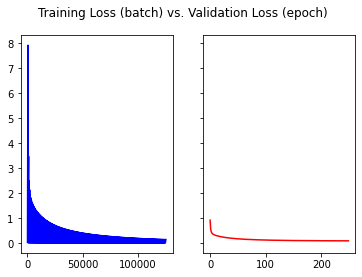

In [42]:
# 50k in train set, batch_size = 100 50k/100 = 500 iterations

n_epochs = 250
print(f'using model {model} with optimizer {optimizer} and criterion {criterion} with {n_epochs} epochs\n\n')

epoch_loss_capture = []
batch_loss_capture = []
valid_loss_capture = []
for e in range(n_epochs):
  train_loss = 0.0

  for data, labels in tqdm(trainLoader):
    if torch.cuda.is_available():
      data, labels = data.cuda(), labels.cuda()

    optimizer.zero_grad()
    target = model(data)
    loss = criterion(target, labels)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()
    batch_loss_capture.append(train_loss / BATCH_SIZE)

  valid_loss = 0.0
  model.eval()
  for data, labels in validLoader:
    if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
    # Forward Pass
    target = model(data)
    # Find the Loss
    loss = criterion(target,labels)
    # Calculate Loss
    valid_loss += loss.item()
  
  epoch_loss_capture.append(train_loss / len(trainLoader))
  valid_loss_capture.append(valid_loss / len(validLoader))
  print(f'epoch {e+1} \n Training Loss: {train_loss / len(trainLoader)}')
  print(f'Epoch {e+1} \n Validation Loss {valid_loss / len(validLoader)}')

print('\n')
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.suptitle('Training Loss (batch) vs. Validation Loss (epoch)')
ax1.plot(batch_loss_capture, color='blue')
ax2.plot(valid_loss_capture, color='red')

plt.show()

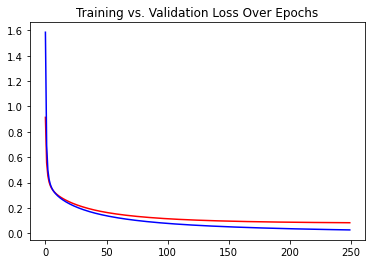

In [43]:
plt.title('Training vs. Validation Loss Over Epochs')
plt.plot(valid_loss_capture, color='red')
plt.plot(epoch_loss_capture, color='blue')
plt.show()

In [44]:
y_pred, y_true = predict_val(model, testLoader)
diffs = y_true - y_pred

In [45]:
100 - len([v for v in diffs if v != 0])/len(diffs)*100

97.9

In [46]:
pd.DataFrame(confusion_matrix(y_true, y_pred, labels=np.arange(0, 10)))

,0,1,2,3,4,5,6,7,8,9
0,966,0,1,1,1,2,3,2,2,2
1,0,1124,3,1,0,1,2,1,3,0
2,5,3,1007,4,3,0,2,4,4,0
3,0,0,6,994,0,1,0,3,3,3
4,1,0,3,1,958,0,3,2,2,12
5,3,1,0,8,2,870,5,0,2,1
6,5,3,1,0,3,4,940,0,2,0
7,0,5,10,3,0,0,0,1004,2,4
8,5,0,3,4,3,3,4,3,948,1
9,2,3,1,6,9,1,1,5,2,979


Next we run the same network but this time using L2 Regularization. For pytorch this means setting the weight_decay param to < 0 (see: https://stackoverflow.com/questions/42704283/l1-l2-regularization-in-pytorch). We run this again to see what we get...

In [47]:
# updating to use L2 Regularization

model = ThreeLayer()

if torch.cuda.is_available():
    model = model.cuda()

optimizerL2 = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-5)

using model ThreeLayer(
  (layer1): Linear(in_features=784, out_features=500, bias=True)
  (layer2): Linear(in_features=500, out_features=10, bias=True)
) with optimizer SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 1e-05
) and criterion CrossEntropyLoss()


100%|██████████| 500/500 [00:05<00:00, 97.78it/s] 


epoch 1 
 Training Loss: 1.5826744338274001
Epoch 1 
 Validation Loss 0.9170443892478943


100%|██████████| 500/500 [00:04<00:00, 105.43it/s]


epoch 2 
 Training Loss: 0.698072283565998
Epoch 2 
 Validation Loss 0.5589177882671357


100%|██████████| 500/500 [00:04<00:00, 105.48it/s]


epoch 3 
 Training Loss: 0.5023194136023521
Epoch 3 
 Validation Loss 0.45531743824481963


100%|██████████| 500/500 [00:04<00:00, 105.40it/s]


epoch 4 
 Training Loss: 0.42925646382570265
Epoch 4 
 Validation Loss 0.40678447782993316


100%|██████████| 500/500 [00:04<00:00, 105.25it/s]


epoch 5 
 Training Loss: 0.3902178937792778
Epoch 5 
 Validation Loss 0.3781705978512764


100%|██████████| 500/500 [00:04<00:00, 103.94it/s]


epoch 6 
 Training Loss: 0.3650830268859863
Epoch 6 
 Validation Loss 0.35872411608695987


100%|██████████| 500/500 [00:04<00:00, 105.71it/s]


epoch 7 
 Training Loss: 0.34687378439307215
Epoch 7 
 Validation Loss 0.3441637773811817


100%|██████████| 500/500 [00:04<00:00, 103.11it/s]


epoch 8 
 Training Loss: 0.33259210926294325
Epoch 8 
 Validation Loss 0.3325054842233658


100%|██████████| 500/500 [00:04<00:00, 104.18it/s]


epoch 9 
 Training Loss: 0.3207478382587433
Epoch 9 
 Validation Loss 0.3227338492870331


100%|██████████| 500/500 [00:04<00:00, 105.81it/s]


epoch 10 
 Training Loss: 0.31053042855858803
Epoch 10 
 Validation Loss 0.314216381162405


100%|██████████| 500/500 [00:04<00:00, 102.47it/s]


epoch 11 
 Training Loss: 0.30144514729082583
Epoch 11 
 Validation Loss 0.30658675253391265


100%|██████████| 500/500 [00:04<00:00, 102.81it/s]


epoch 12 
 Training Loss: 0.2931839002519846
Epoch 12 
 Validation Loss 0.29964832484722137


100%|██████████| 500/500 [00:04<00:00, 102.87it/s]


epoch 13 
 Training Loss: 0.2855559398382902
Epoch 13 
 Validation Loss 0.29319206371903417


100%|██████████| 500/500 [00:04<00:00, 104.61it/s]


epoch 14 
 Training Loss: 0.2784233852177858
Epoch 14 
 Validation Loss 0.2871377992630005


100%|██████████| 500/500 [00:04<00:00, 104.90it/s]


epoch 15 
 Training Loss: 0.27169924990832806
Epoch 15 
 Validation Loss 0.28139986127614974


100%|██████████| 500/500 [00:04<00:00, 104.69it/s]


epoch 16 
 Training Loss: 0.26532624197006227
Epoch 16 
 Validation Loss 0.27591546267271044


100%|██████████| 500/500 [00:04<00:00, 102.39it/s]


epoch 17 
 Training Loss: 0.25924289180338383
Epoch 17 
 Validation Loss 0.27064958155155183


100%|██████████| 500/500 [00:04<00:00, 105.70it/s]


epoch 18 
 Training Loss: 0.2534056309759617
Epoch 18 
 Validation Loss 0.2655871631205082


100%|██████████| 500/500 [00:04<00:00, 104.83it/s]


epoch 19 
 Training Loss: 0.24780168557167054
Epoch 19 
 Validation Loss 0.26070400670170785


100%|██████████| 500/500 [00:05<00:00, 89.68it/s] 


epoch 20 
 Training Loss: 0.24241099567711352
Epoch 20 
 Validation Loss 0.2559751956164837


100%|██████████| 500/500 [00:04<00:00, 105.05it/s]


epoch 21 
 Training Loss: 0.23722143797576428
Epoch 21 
 Validation Loss 0.2514299436658621


100%|██████████| 500/500 [00:04<00:00, 102.81it/s]


epoch 22 
 Training Loss: 0.2322278845757246
Epoch 22 
 Validation Loss 0.24705554030835628


100%|██████████| 500/500 [00:04<00:00, 103.98it/s]


epoch 23 
 Training Loss: 0.22742646095156668
Epoch 23 
 Validation Loss 0.24283752255141736


100%|██████████| 500/500 [00:04<00:00, 104.16it/s]


epoch 24 
 Training Loss: 0.22280262027680875
Epoch 24 
 Validation Loss 0.23875417672097682


100%|██████████| 500/500 [00:04<00:00, 105.17it/s]


epoch 25 
 Training Loss: 0.21834433487057686
Epoch 25 
 Validation Loss 0.2348244420439005


100%|██████████| 500/500 [00:04<00:00, 105.03it/s]


epoch 26 
 Training Loss: 0.21404597254097463
Epoch 26 
 Validation Loss 0.23102383747696875


100%|██████████| 500/500 [00:04<00:00, 103.36it/s]


epoch 27 
 Training Loss: 0.20989561016857625
Epoch 27 
 Validation Loss 0.22735486663877963


100%|██████████| 500/500 [00:04<00:00, 104.52it/s]


epoch 28 
 Training Loss: 0.20587757547199725
Epoch 28 
 Validation Loss 0.2237878367304802


100%|██████████| 500/500 [00:04<00:00, 105.94it/s]


epoch 29 
 Training Loss: 0.20199401696026326
Epoch 29 
 Validation Loss 0.22034209720790388


100%|██████████| 500/500 [00:04<00:00, 104.72it/s]


epoch 30 
 Training Loss: 0.19823603102564813
Epoch 30 
 Validation Loss 0.2170079904049635


100%|██████████| 500/500 [00:04<00:00, 106.09it/s]


epoch 31 
 Training Loss: 0.19458858328312637
Epoch 31 
 Validation Loss 0.21376897379755974


100%|██████████| 500/500 [00:04<00:00, 105.15it/s]


epoch 32 
 Training Loss: 0.1910543894842267
Epoch 32 
 Validation Loss 0.21062782987952233


100%|██████████| 500/500 [00:04<00:00, 102.91it/s]


epoch 33 
 Training Loss: 0.18763492593914272
Epoch 33 
 Validation Loss 0.20758443638682367


100%|██████████| 500/500 [00:04<00:00, 103.90it/s]


epoch 34 
 Training Loss: 0.18431505216658114
Epoch 34 
 Validation Loss 0.2046433837711811


100%|██████████| 500/500 [00:04<00:00, 105.72it/s]


epoch 35 
 Training Loss: 0.18109449477493764
Epoch 35 
 Validation Loss 0.20178934149444103


100%|██████████| 500/500 [00:04<00:00, 105.40it/s]


epoch 36 
 Training Loss: 0.1779675359725952
Epoch 36 
 Validation Loss 0.1990214840322733


100%|██████████| 500/500 [00:04<00:00, 104.20it/s]


epoch 37 
 Training Loss: 0.17493520402163268
Epoch 37 
 Validation Loss 0.1963441226631403


100%|██████████| 500/500 [00:04<00:00, 104.07it/s]


epoch 38 
 Training Loss: 0.17198995918035506
Epoch 38 
 Validation Loss 0.19374835334718227


100%|██████████| 500/500 [00:04<00:00, 103.21it/s]


epoch 39 
 Training Loss: 0.1691271427348256
Epoch 39 
 Validation Loss 0.19121172167360784


100%|██████████| 500/500 [00:04<00:00, 105.36it/s]


epoch 40 
 Training Loss: 0.16633933968096973
Epoch 40 
 Validation Loss 0.18874441146850585


100%|██████████| 500/500 [00:04<00:00, 106.06it/s]


epoch 41 
 Training Loss: 0.16363088918477298
Epoch 41 
 Validation Loss 0.18634037621319294


100%|██████████| 500/500 [00:05<00:00, 91.81it/s]


epoch 42 
 Training Loss: 0.1610001172348857
Epoch 42 
 Validation Loss 0.1840038488805294


100%|██████████| 500/500 [00:04<00:00, 104.69it/s]


epoch 43 
 Training Loss: 0.1584388370811939
Epoch 43 
 Validation Loss 0.18172562133520842


100%|██████████| 500/500 [00:04<00:00, 103.17it/s]


epoch 44 
 Training Loss: 0.1559510069489479
Epoch 44 
 Validation Loss 0.17951921194791795


100%|██████████| 500/500 [00:04<00:00, 103.45it/s]


epoch 45 
 Training Loss: 0.1535288966819644
Epoch 45 
 Validation Loss 0.17736673027276992


100%|██████████| 500/500 [00:04<00:00, 104.79it/s]


epoch 46 
 Training Loss: 0.15116764584928752
Epoch 46 
 Validation Loss 0.17527059726417066


100%|██████████| 500/500 [00:04<00:00, 104.70it/s]


epoch 47 
 Training Loss: 0.14886856415867805
Epoch 47 
 Validation Loss 0.17322841443121434


100%|██████████| 500/500 [00:04<00:00, 103.84it/s]


epoch 48 
 Training Loss: 0.14663157859444617
Epoch 48 
 Validation Loss 0.17124941743910313


100%|██████████| 500/500 [00:04<00:00, 103.79it/s]


epoch 49 
 Training Loss: 0.14445416214317083
Epoch 49 
 Validation Loss 0.16933137744665147


100%|██████████| 500/500 [00:04<00:00, 103.47it/s]


epoch 50 
 Training Loss: 0.14233368771523236
Epoch 50 
 Validation Loss 0.16746569603681563


100%|██████████| 500/500 [00:04<00:00, 102.49it/s]


epoch 51 
 Training Loss: 0.14026665093749763
Epoch 51 
 Validation Loss 0.1656593017280102


100%|██████████| 500/500 [00:04<00:00, 104.04it/s]


epoch 52 
 Training Loss: 0.13824972131103277
Epoch 52 
 Validation Loss 0.16389280799776315


100%|██████████| 500/500 [00:04<00:00, 105.32it/s]


epoch 53 
 Training Loss: 0.13628039569407702
Epoch 53 
 Validation Loss 0.16217910703271626


100%|██████████| 500/500 [00:04<00:00, 105.92it/s]


epoch 54 
 Training Loss: 0.13435823626071214
Epoch 54 
 Validation Loss 0.1605017189309001


100%|██████████| 500/500 [00:04<00:00, 101.61it/s]


epoch 55 
 Training Loss: 0.1324798887297511
Epoch 55 
 Validation Loss 0.1588714314624667


100%|██████████| 500/500 [00:04<00:00, 105.43it/s]


epoch 56 
 Training Loss: 0.13064543048292399
Epoch 56 
 Validation Loss 0.15727630883455276


100%|██████████| 500/500 [00:04<00:00, 104.11it/s]


epoch 57 
 Training Loss: 0.12885673338919879
Epoch 57 
 Validation Loss 0.155732541680336


100%|██████████| 500/500 [00:04<00:00, 104.05it/s]


epoch 58 
 Training Loss: 0.12710962542146445
Epoch 58 
 Validation Loss 0.15422241177409887


100%|██████████| 500/500 [00:04<00:00, 104.20it/s]


epoch 59 
 Training Loss: 0.12540438113361596
Epoch 59 
 Validation Loss 0.1527543755620718


100%|██████████| 500/500 [00:04<00:00, 103.07it/s]


epoch 60 
 Training Loss: 0.12373769509792328
Epoch 60 
 Validation Loss 0.15132844321429728


100%|██████████| 500/500 [00:04<00:00, 104.56it/s]


epoch 61 
 Training Loss: 0.12210899797827006
Epoch 61 
 Validation Loss 0.14994349498301746


100%|██████████| 500/500 [00:04<00:00, 105.43it/s]


epoch 62 
 Training Loss: 0.12051983453333377
Epoch 62 
 Validation Loss 0.14860002990812063


100%|██████████| 500/500 [00:04<00:00, 104.13it/s]


epoch 63 
 Training Loss: 0.11896906629949808
Epoch 63 
 Validation Loss 0.14729408975690603


100%|██████████| 500/500 [00:04<00:00, 105.05it/s]


epoch 64 
 Training Loss: 0.11745244009792805
Epoch 64 
 Validation Loss 0.14602171149104834


100%|██████████| 500/500 [00:05<00:00, 89.40it/s] 


epoch 65 
 Training Loss: 0.11597187141701579
Epoch 65 
 Validation Loss 0.14478774692863225


100%|██████████| 500/500 [00:04<00:00, 101.62it/s]


epoch 66 
 Training Loss: 0.11452026196569204
Epoch 66 
 Validation Loss 0.1435806255042553


100%|██████████| 500/500 [00:04<00:00, 102.47it/s]


epoch 67 
 Training Loss: 0.11310034826025367
Epoch 67 
 Validation Loss 0.14239791180938483


100%|██████████| 500/500 [00:04<00:00, 104.62it/s]


epoch 68 
 Training Loss: 0.11171208053454756
Epoch 68 
 Validation Loss 0.1412438740581274


100%|██████████| 500/500 [00:04<00:00, 103.87it/s]


epoch 69 
 Training Loss: 0.11035265745222568
Epoch 69 
 Validation Loss 0.14011840485036373


100%|██████████| 500/500 [00:04<00:00, 104.47it/s]


epoch 70 
 Training Loss: 0.10902155615016818
Epoch 70 
 Validation Loss 0.13902034848928452


100%|██████████| 500/500 [00:04<00:00, 102.75it/s]


epoch 71 
 Training Loss: 0.10771878895163536
Epoch 71 
 Validation Loss 0.13794332407414914


100%|██████████| 500/500 [00:04<00:00, 104.78it/s]


epoch 72 
 Training Loss: 0.10644329750537872
Epoch 72 
 Validation Loss 0.1368918063491583


100%|██████████| 500/500 [00:04<00:00, 104.69it/s]


epoch 73 
 Training Loss: 0.1051948290206492
Epoch 73 
 Validation Loss 0.13586826775223015


100%|██████████| 500/500 [00:04<00:00, 105.29it/s]


epoch 74 
 Training Loss: 0.10397223757952452
Epoch 74 
 Validation Loss 0.13486613146960735


100%|██████████| 500/500 [00:04<00:00, 104.32it/s]


epoch 75 
 Training Loss: 0.10277582846581935
Epoch 75 
 Validation Loss 0.13388640351593495


100%|██████████| 500/500 [00:04<00:00, 101.91it/s]


epoch 76 
 Training Loss: 0.10160189608857036
Epoch 76 
 Validation Loss 0.13293666109442712


100%|██████████| 500/500 [00:04<00:00, 104.94it/s]


epoch 77 
 Training Loss: 0.10045090495422483
Epoch 77 
 Validation Loss 0.13200573045760394


100%|██████████| 500/500 [00:04<00:00, 104.52it/s]


epoch 78 
 Training Loss: 0.09932224882394075
Epoch 78 
 Validation Loss 0.13110171552747488


100%|██████████| 500/500 [00:04<00:00, 103.80it/s]


epoch 79 
 Training Loss: 0.09821524769812823
Epoch 79 
 Validation Loss 0.13021869683638215


100%|██████████| 500/500 [00:04<00:00, 103.03it/s]


epoch 80 
 Training Loss: 0.09712732411175966
Epoch 80 
 Validation Loss 0.12935164473950864


100%|██████████| 500/500 [00:04<00:00, 103.83it/s]


epoch 81 
 Training Loss: 0.09606118992343544
Epoch 81 
 Validation Loss 0.12850161280483008


100%|██████████| 500/500 [00:04<00:00, 100.89it/s]


epoch 82 
 Training Loss: 0.09501276426762342
Epoch 82 
 Validation Loss 0.12766636969521641


100%|██████████| 500/500 [00:04<00:00, 105.64it/s]


epoch 83 
 Training Loss: 0.09398394346609712
Epoch 83 
 Validation Loss 0.12684658134356142


100%|██████████| 500/500 [00:04<00:00, 105.13it/s]


epoch 84 
 Training Loss: 0.09297204489260912
Epoch 84 
 Validation Loss 0.1260506135970354


100%|██████████| 500/500 [00:04<00:00, 105.07it/s]


epoch 85 
 Training Loss: 0.09198059077560902
Epoch 85 
 Validation Loss 0.12526797398924827


100%|██████████| 500/500 [00:04<00:00, 105.46it/s]


epoch 86 
 Training Loss: 0.0910046694278717
Epoch 86 
 Validation Loss 0.12450253915041685


100%|██████████| 500/500 [00:05<00:00, 92.83it/s]


epoch 87 
 Training Loss: 0.09004837220162153
Epoch 87 
 Validation Loss 0.12374914050102234


100%|██████████| 500/500 [00:04<00:00, 104.12it/s]


epoch 88 
 Training Loss: 0.0891087613478303
Epoch 88 
 Validation Loss 0.12301204742863775


100%|██████████| 500/500 [00:04<00:00, 104.27it/s]


epoch 89 
 Training Loss: 0.0881866208910942
Epoch 89 
 Validation Loss 0.12229440001770854


100%|██████████| 500/500 [00:04<00:00, 103.76it/s]


epoch 90 
 Training Loss: 0.08728128699585795
Epoch 90 
 Validation Loss 0.12158533059060574


100%|██████████| 500/500 [00:04<00:00, 104.50it/s]


epoch 91 
 Training Loss: 0.08638869402185083
Epoch 91 
 Validation Loss 0.12089059578254818


100%|██████████| 500/500 [00:04<00:00, 102.75it/s]


epoch 92 
 Training Loss: 0.08551210669055581
Epoch 92 
 Validation Loss 0.12021197758615017


100%|██████████| 500/500 [00:04<00:00, 103.56it/s]


epoch 93 
 Training Loss: 0.08465016867592931
Epoch 93 
 Validation Loss 0.11953857166692615


100%|██████████| 500/500 [00:04<00:00, 103.21it/s]


epoch 94 
 Training Loss: 0.08380172925069929
Epoch 94 
 Validation Loss 0.11889099307358265


100%|██████████| 500/500 [00:04<00:00, 103.95it/s]


epoch 95 
 Training Loss: 0.08296833727508783
Epoch 95 
 Validation Loss 0.11824679588899016


100%|██████████| 500/500 [00:04<00:00, 105.55it/s]


epoch 96 
 Training Loss: 0.08215028119832277
Epoch 96 
 Validation Loss 0.11761557055637241


100%|██████████| 500/500 [00:04<00:00, 104.03it/s]


epoch 97 
 Training Loss: 0.08134618064016104
Epoch 97 
 Validation Loss 0.11700897119939327


100%|██████████| 500/500 [00:04<00:00, 102.42it/s]


epoch 98 
 Training Loss: 0.08055458070710302
Epoch 98 
 Validation Loss 0.1163987666554749


100%|██████████| 500/500 [00:04<00:00, 105.41it/s]


epoch 99 
 Training Loss: 0.07977467257902027
Epoch 99 
 Validation Loss 0.11580653151497244


100%|██████████| 500/500 [00:04<00:00, 103.92it/s]


epoch 100 
 Training Loss: 0.07900837200507521
Epoch 100 
 Validation Loss 0.11522232040762902


100%|██████████| 500/500 [00:04<00:00, 104.79it/s]


epoch 101 
 Training Loss: 0.07825379237160086
Epoch 101 
 Validation Loss 0.11464856242761017


100%|██████████| 500/500 [00:04<00:00, 103.98it/s]


epoch 102 
 Training Loss: 0.07751098055392504
Epoch 102 
 Validation Loss 0.11409273732453584


100%|██████████| 500/500 [00:04<00:00, 100.99it/s]


epoch 103 
 Training Loss: 0.07678073009103537
Epoch 103 
 Validation Loss 0.11354099465534091


100%|██████████| 500/500 [00:04<00:00, 104.26it/s]


epoch 104 
 Training Loss: 0.07606050832942128
Epoch 104 
 Validation Loss 0.11300559964030982


100%|██████████| 500/500 [00:04<00:00, 103.87it/s]


epoch 105 
 Training Loss: 0.07535271061584353
Epoch 105 
 Validation Loss 0.11247686007991434


100%|██████████| 500/500 [00:04<00:00, 104.49it/s]


epoch 106 
 Training Loss: 0.0746555699966848
Epoch 106 
 Validation Loss 0.11196177100762725


100%|██████████| 500/500 [00:04<00:00, 104.74it/s]


epoch 107 
 Training Loss: 0.0739686772339046
Epoch 107 
 Validation Loss 0.11144991857931018


100%|██████████| 500/500 [00:04<00:00, 103.60it/s]


epoch 108 
 Training Loss: 0.07329329472035169
Epoch 108 
 Validation Loss 0.11095562350004912


100%|██████████| 500/500 [00:04<00:00, 103.09it/s]


epoch 109 
 Training Loss: 0.0726258082985878
Epoch 109 
 Validation Loss 0.11046577844768762


100%|██████████| 500/500 [00:05<00:00, 93.45it/s] 


epoch 110 
 Training Loss: 0.07197122476994991
Epoch 110 
 Validation Loss 0.10998336607590317


100%|██████████| 500/500 [00:04<00:00, 104.28it/s]


epoch 111 
 Training Loss: 0.07132453132793307
Epoch 111 
 Validation Loss 0.10951201902702451


100%|██████████| 500/500 [00:04<00:00, 102.95it/s]


epoch 112 
 Training Loss: 0.07068812604993582
Epoch 112 
 Validation Loss 0.10904668226838111


100%|██████████| 500/500 [00:04<00:00, 103.91it/s]


epoch 113 
 Training Loss: 0.07006151436641812
Epoch 113 
 Validation Loss 0.10858852950856089


100%|██████████| 500/500 [00:04<00:00, 103.21it/s]


epoch 114 
 Training Loss: 0.06944376331195236
Epoch 114 
 Validation Loss 0.10814603356644512


100%|██████████| 500/500 [00:04<00:00, 103.71it/s]


epoch 115 
 Training Loss: 0.06883397998102009
Epoch 115 
 Validation Loss 0.10770281590521336


100%|██████████| 500/500 [00:04<00:00, 104.41it/s]


epoch 116 
 Training Loss: 0.06823395424522459
Epoch 116 
 Validation Loss 0.10727294974029064


100%|██████████| 500/500 [00:04<00:00, 103.81it/s]


epoch 117 
 Training Loss: 0.06764248698949814
Epoch 117 
 Validation Loss 0.10684701021760702


100%|██████████| 500/500 [00:04<00:00, 104.05it/s]


epoch 118 
 Training Loss: 0.06705974110588431
Epoch 118 
 Validation Loss 0.10643442619591952


100%|██████████| 500/500 [00:05<00:00, 98.41it/s]


epoch 119 
 Training Loss: 0.06648384634405374
Epoch 119 
 Validation Loss 0.10603229373693467


100%|██████████| 500/500 [00:04<00:00, 102.67it/s]


epoch 120 
 Training Loss: 0.06591620073281229
Epoch 120 
 Validation Loss 0.10563227182254195


100%|██████████| 500/500 [00:04<00:00, 102.52it/s]


epoch 121 
 Training Loss: 0.06535658416338265
Epoch 121 
 Validation Loss 0.1052412142418325


100%|██████████| 500/500 [00:04<00:00, 100.04it/s]


epoch 122 
 Training Loss: 0.0648052572440356
Epoch 122 
 Validation Loss 0.10485586551949382


100%|██████████| 500/500 [00:04<00:00, 103.13it/s]


epoch 123 
 Training Loss: 0.06426122243702412
Epoch 123 
 Validation Loss 0.10447790009900927


100%|██████████| 500/500 [00:04<00:00, 102.31it/s]


epoch 124 
 Training Loss: 0.06372448490001262
Epoch 124 
 Validation Loss 0.10410901520401239


100%|██████████| 500/500 [00:04<00:00, 104.70it/s]


epoch 125 
 Training Loss: 0.06319406201504171
Epoch 125 
 Validation Loss 0.10374287143349648


100%|██████████| 500/500 [00:04<00:00, 104.29it/s]


epoch 126 
 Training Loss: 0.06267286118119955
Epoch 126 
 Validation Loss 0.10338409757241607


100%|██████████| 500/500 [00:04<00:00, 104.79it/s]


epoch 127 
 Training Loss: 0.06215738961845636
Epoch 127 
 Validation Loss 0.10303535159677267


100%|██████████| 500/500 [00:04<00:00, 105.83it/s]


epoch 128 
 Training Loss: 0.06164944196119904
Epoch 128 
 Validation Loss 0.10269110510125756


100%|██████████| 500/500 [00:04<00:00, 103.97it/s]


epoch 129 
 Training Loss: 0.06114733457937837
Epoch 129 
 Validation Loss 0.10235627768561244


100%|██████████| 500/500 [00:04<00:00, 101.12it/s]


epoch 130 
 Training Loss: 0.06065148950740695
Epoch 130 
 Validation Loss 0.1020157909579575


100%|██████████| 500/500 [00:04<00:00, 104.70it/s]


epoch 131 
 Training Loss: 0.06016115157864988
Epoch 131 
 Validation Loss 0.1016865792684257


100%|██████████| 500/500 [00:05<00:00, 90.10it/s]


epoch 132 
 Training Loss: 0.05967899581976235
Epoch 132 
 Validation Loss 0.10136656133458018


100%|██████████| 500/500 [00:04<00:00, 104.06it/s]


epoch 133 
 Training Loss: 0.05920161903835833
Epoch 133 
 Validation Loss 0.10104848105460405


100%|██████████| 500/500 [00:04<00:00, 102.36it/s]


epoch 134 
 Training Loss: 0.058730131400749085
Epoch 134 
 Validation Loss 0.10073095552623272


100%|██████████| 500/500 [00:05<00:00, 99.83it/s] 


epoch 135 
 Training Loss: 0.058264789707958696
Epoch 135 
 Validation Loss 0.10042432840913534


100%|██████████| 500/500 [00:04<00:00, 102.48it/s]


epoch 136 
 Training Loss: 0.057806315576657656
Epoch 136 
 Validation Loss 0.10011773115023971


100%|██████████| 500/500 [00:04<00:00, 103.02it/s]


epoch 137 
 Training Loss: 0.05735253899544478
Epoch 137 
 Validation Loss 0.09981970006600022


100%|██████████| 500/500 [00:04<00:00, 103.88it/s]


epoch 138 
 Training Loss: 0.0569042181391269
Epoch 138 
 Validation Loss 0.09953044198453426


100%|██████████| 500/500 [00:04<00:00, 104.87it/s]


epoch 139 
 Training Loss: 0.056462566256523135
Epoch 139 
 Validation Loss 0.09923911165446044


100%|██████████| 500/500 [00:04<00:00, 102.58it/s]


epoch 140 
 Training Loss: 0.056025702655315396
Epoch 140 
 Validation Loss 0.0989491138793528


100%|██████████| 500/500 [00:04<00:00, 103.92it/s]


epoch 141 
 Training Loss: 0.05559419396333396
Epoch 141 
 Validation Loss 0.09867232870310545


100%|██████████| 500/500 [00:04<00:00, 104.05it/s]


epoch 142 
 Training Loss: 0.05516793595068157
Epoch 142 
 Validation Loss 0.09839639756828547


100%|██████████| 500/500 [00:04<00:00, 103.80it/s]


epoch 143 
 Training Loss: 0.054745792560279366
Epoch 143 
 Validation Loss 0.0981187061406672


100%|██████████| 500/500 [00:04<00:00, 104.23it/s]


epoch 144 
 Training Loss: 0.054328706964850426
Epoch 144 
 Validation Loss 0.09785166118294


100%|██████████| 500/500 [00:04<00:00, 104.37it/s]


epoch 145 
 Training Loss: 0.05391645853593945
Epoch 145 
 Validation Loss 0.09758854074403643


100%|██████████| 500/500 [00:04<00:00, 102.28it/s]


epoch 146 
 Training Loss: 0.0535090581420809
Epoch 146 
 Validation Loss 0.09732625229284167


100%|██████████| 500/500 [00:04<00:00, 104.63it/s]


epoch 147 
 Training Loss: 0.053105090530589226
Epoch 147 
 Validation Loss 0.09707430183887482


100%|██████████| 500/500 [00:04<00:00, 103.85it/s]


epoch 148 
 Training Loss: 0.052706359645351766
Epoch 148 
 Validation Loss 0.09682153578847646


100%|██████████| 500/500 [00:04<00:00, 104.00it/s]


epoch 149 
 Training Loss: 0.05231354746967554
Epoch 149 
 Validation Loss 0.09657642129808665


100%|██████████| 500/500 [00:04<00:00, 103.09it/s]


epoch 150 
 Training Loss: 0.05192409886233509
Epoch 150 
 Validation Loss 0.09632942855358123


100%|██████████| 500/500 [00:04<00:00, 103.17it/s]


epoch 151 
 Training Loss: 0.05154007276333868
Epoch 151 
 Validation Loss 0.09608476053923369


100%|██████████| 500/500 [00:04<00:00, 103.98it/s]


epoch 152 
 Training Loss: 0.051159337697550655
Epoch 152 
 Validation Loss 0.09585349649190902


100%|██████████| 500/500 [00:04<00:00, 105.10it/s]


epoch 153 
 Training Loss: 0.05078264101408422
Epoch 153 
 Validation Loss 0.09561725437641144


100%|██████████| 500/500 [00:05<00:00, 90.03it/s] 


epoch 154 
 Training Loss: 0.05041058620624244
Epoch 154 
 Validation Loss 0.09538420071825385


100%|██████████| 500/500 [00:04<00:00, 104.79it/s]


epoch 155 
 Training Loss: 0.05004278503358364
Epoch 155 
 Validation Loss 0.09515818998217583


100%|██████████| 500/500 [00:04<00:00, 102.97it/s]


epoch 156 
 Training Loss: 0.049679853849112984
Epoch 156 
 Validation Loss 0.09493608416989446


100%|██████████| 500/500 [00:04<00:00, 101.10it/s]


epoch 157 
 Training Loss: 0.049318678425624964
Epoch 157 
 Validation Loss 0.09471717538312077


100%|██████████| 500/500 [00:04<00:00, 104.53it/s]


epoch 158 
 Training Loss: 0.048963027998805045
Epoch 158 
 Validation Loss 0.09450366484001278


100%|██████████| 500/500 [00:04<00:00, 103.85it/s]


epoch 159 
 Training Loss: 0.04861235779337585
Epoch 159 
 Validation Loss 0.09429138192906976


100%|██████████| 500/500 [00:04<00:00, 104.44it/s]


epoch 160 
 Training Loss: 0.04826405106857419
Epoch 160 
 Validation Loss 0.09408566279336811


100%|██████████| 500/500 [00:04<00:00, 103.10it/s]


epoch 161 
 Training Loss: 0.04791781753487885
Epoch 161 
 Validation Loss 0.09387324744835496


100%|██████████| 500/500 [00:04<00:00, 102.44it/s]


epoch 162 
 Training Loss: 0.047578348580747845
Epoch 162 
 Validation Loss 0.09367097228765488


100%|██████████| 500/500 [00:04<00:00, 102.23it/s]


epoch 163 
 Training Loss: 0.0472409208137542
Epoch 163 
 Validation Loss 0.09346701690927148


100%|██████████| 500/500 [00:04<00:00, 104.06it/s]


epoch 164 
 Training Loss: 0.04690729268454015
Epoch 164 
 Validation Loss 0.0932745560258627


100%|██████████| 500/500 [00:04<00:00, 102.80it/s]


epoch 165 
 Training Loss: 0.04657656118832529
Epoch 165 
 Validation Loss 0.09307882592082023


100%|██████████| 500/500 [00:04<00:00, 103.63it/s]


epoch 166 
 Training Loss: 0.04625099212117493
Epoch 166 
 Validation Loss 0.09288924764841795


100%|██████████| 500/500 [00:04<00:00, 103.34it/s]


epoch 167 
 Training Loss: 0.04592950100451708
Epoch 167 
 Validation Loss 0.09269944306463003


100%|██████████| 500/500 [00:04<00:00, 103.46it/s]


epoch 168 
 Training Loss: 0.04560826647095382
Epoch 168 
 Validation Loss 0.09251606399193406


100%|██████████| 500/500 [00:04<00:00, 104.18it/s]


epoch 169 
 Training Loss: 0.04529200055450201
Epoch 169 
 Validation Loss 0.09233749050647021


100%|██████████| 500/500 [00:04<00:00, 104.37it/s]


epoch 170 
 Training Loss: 0.04497863533906639
Epoch 170 
 Validation Loss 0.09215726763010025


100%|██████████| 500/500 [00:04<00:00, 104.07it/s]


epoch 171 
 Training Loss: 0.04466975434310734
Epoch 171 
 Validation Loss 0.09197507103905082


100%|██████████| 500/500 [00:04<00:00, 103.74it/s]


epoch 172 
 Training Loss: 0.044362238733097914
Epoch 172 
 Validation Loss 0.09180303659290075


100%|██████████| 500/500 [00:04<00:00, 101.10it/s]


epoch 173 
 Training Loss: 0.0440598516985774
Epoch 173 
 Validation Loss 0.09163144836202264


100%|██████████| 500/500 [00:04<00:00, 102.81it/s]


epoch 174 
 Training Loss: 0.04375854516774416
Epoch 174 
 Validation Loss 0.09146263115108014


100%|██████████| 500/500 [00:04<00:00, 103.38it/s]


epoch 175 
 Training Loss: 0.04346020304597914
Epoch 175 
 Validation Loss 0.09129054618999362


100%|██████████| 500/500 [00:05<00:00, 88.87it/s] 


epoch 176 
 Training Loss: 0.043166624423116445
Epoch 176 
 Validation Loss 0.0911287054605782


100%|██████████| 500/500 [00:04<00:00, 103.18it/s]


epoch 177 
 Training Loss: 0.042874301861971616
Epoch 177 
 Validation Loss 0.09096545586362481


100%|██████████| 500/500 [00:04<00:00, 100.45it/s]


epoch 178 
 Training Loss: 0.04258684862591326
Epoch 178 
 Validation Loss 0.09080331847071647


100%|██████████| 500/500 [00:04<00:00, 102.64it/s]


epoch 179 
 Training Loss: 0.04229926059395075
Epoch 179 
 Validation Loss 0.09064162546768785


100%|██████████| 500/500 [00:04<00:00, 103.10it/s]


epoch 180 
 Training Loss: 0.04201755864359438
Epoch 180 
 Validation Loss 0.09048598596826196


100%|██████████| 500/500 [00:04<00:00, 103.66it/s]


epoch 181 
 Training Loss: 0.041736940544098614
Epoch 181 
 Validation Loss 0.09032959731295705


100%|██████████| 500/500 [00:04<00:00, 104.74it/s]


epoch 182 
 Training Loss: 0.0414587064050138
Epoch 182 
 Validation Loss 0.09017860389314591


100%|██████████| 500/500 [00:04<00:00, 104.35it/s]


epoch 183 
 Training Loss: 0.04118386962544173
Epoch 183 
 Validation Loss 0.09002418423071504


100%|██████████| 500/500 [00:04<00:00, 102.50it/s]


epoch 184 
 Training Loss: 0.04091114387847483
Epoch 184 
 Validation Loss 0.0898803701158613


100%|██████████| 500/500 [00:04<00:00, 104.99it/s]


epoch 185 
 Training Loss: 0.04064186787232757
Epoch 185 
 Validation Loss 0.08973316029645502


100%|██████████| 500/500 [00:04<00:00, 105.19it/s]


epoch 186 
 Training Loss: 0.04037492980714887
Epoch 186 
 Validation Loss 0.08958922179415822


100%|██████████| 500/500 [00:04<00:00, 104.74it/s]


epoch 187 
 Training Loss: 0.04010956524405628
Epoch 187 
 Validation Loss 0.08945109613239766


100%|██████████| 500/500 [00:04<00:00, 105.58it/s]


epoch 188 
 Training Loss: 0.03984725781343877
Epoch 188 
 Validation Loss 0.08930070230737329


100%|██████████| 500/500 [00:04<00:00, 103.10it/s]


epoch 189 
 Training Loss: 0.039587036795914174
Epoch 189 
 Validation Loss 0.08916780062951148


100%|██████████| 500/500 [00:04<00:00, 104.88it/s]


epoch 190 
 Training Loss: 0.03933070809673518
Epoch 190 
 Validation Loss 0.08902845424599945


100%|██████████| 500/500 [00:04<00:00, 104.36it/s]


epoch 191 
 Training Loss: 0.03907478939369321
Epoch 191 
 Validation Loss 0.08889462455175817


100%|██████████| 500/500 [00:04<00:00, 104.64it/s]


epoch 192 
 Training Loss: 0.038821879133582114
Epoch 192 
 Validation Loss 0.08877160748466849


100%|██████████| 500/500 [00:04<00:00, 103.72it/s]


epoch 193 
 Training Loss: 0.038572101830504836
Epoch 193 
 Validation Loss 0.08862754951231182


100%|██████████| 500/500 [00:04<00:00, 104.13it/s]


epoch 194 
 Training Loss: 0.0383246169378981
Epoch 194 
 Validation Loss 0.08849547709338366


100%|██████████| 500/500 [00:04<00:00, 104.54it/s]


epoch 195 
 Training Loss: 0.03807711341418326
Epoch 195 
 Validation Loss 0.0883687037229538


100%|██████████| 500/500 [00:04<00:00, 104.46it/s]


epoch 196 
 Training Loss: 0.037835295722819864
Epoch 196 
 Validation Loss 0.08824314397759736


100%|██████████| 500/500 [00:04<00:00, 104.44it/s]


epoch 197 
 Training Loss: 0.03759282601810992
Epoch 197 
 Validation Loss 0.08812236895784736


100%|██████████| 500/500 [00:05<00:00, 90.58it/s] 


epoch 198 
 Training Loss: 0.037354863550513984
Epoch 198 
 Validation Loss 0.08798805196769535


100%|██████████| 500/500 [00:04<00:00, 103.64it/s]


epoch 199 
 Training Loss: 0.03711753966473043
Epoch 199 
 Validation Loss 0.08787658235989511


100%|██████████| 500/500 [00:04<00:00, 102.90it/s]


epoch 200 
 Training Loss: 0.03688385643623769
Epoch 200 
 Validation Loss 0.08774868259206414


100%|██████████| 500/500 [00:04<00:00, 104.21it/s]


epoch 201 
 Training Loss: 0.03664980034716427
Epoch 201 
 Validation Loss 0.08763145485892893


100%|██████████| 500/500 [00:04<00:00, 103.80it/s]


epoch 202 
 Training Loss: 0.03641930951550603
Epoch 202 
 Validation Loss 0.0875138970091939


100%|██████████| 500/500 [00:04<00:00, 104.39it/s]


epoch 203 
 Training Loss: 0.036192312110215424
Epoch 203 
 Validation Loss 0.08740069966763259


100%|██████████| 500/500 [00:04<00:00, 103.85it/s]


epoch 204 
 Training Loss: 0.035964460432529446
Epoch 204 
 Validation Loss 0.08728457239456475


100%|██████████| 500/500 [00:04<00:00, 100.75it/s]


epoch 205 
 Training Loss: 0.035741425241343674
Epoch 205 
 Validation Loss 0.08717012986540794


100%|██████████| 500/500 [00:04<00:00, 103.54it/s]


epoch 206 
 Training Loss: 0.0355177628416568
Epoch 206 
 Validation Loss 0.08706101425923407


100%|██████████| 500/500 [00:04<00:00, 103.48it/s]


epoch 207 
 Training Loss: 0.035298724153079095
Epoch 207 
 Validation Loss 0.08694404835812747


100%|██████████| 500/500 [00:04<00:00, 103.37it/s]


epoch 208 
 Training Loss: 0.035078269217163324
Epoch 208 
 Validation Loss 0.0868391197733581


100%|██████████| 500/500 [00:04<00:00, 104.37it/s]


epoch 209 
 Training Loss: 0.03486298741865903
Epoch 209 
 Validation Loss 0.08673825096338987


100%|██████████| 500/500 [00:04<00:00, 102.44it/s]


epoch 210 
 Training Loss: 0.03464804728422314
Epoch 210 
 Validation Loss 0.08663460539653897


100%|██████████| 500/500 [00:04<00:00, 104.39it/s]


epoch 211 
 Training Loss: 0.03443565354403108
Epoch 211 
 Validation Loss 0.08652441119775175


100%|██████████| 500/500 [00:04<00:00, 104.61it/s]


epoch 212 
 Training Loss: 0.03422394868824631
Epoch 212 
 Validation Loss 0.08642118595540524


100%|██████████| 500/500 [00:04<00:00, 104.19it/s]


epoch 213 
 Training Loss: 0.034014579944312576
Epoch 213 
 Validation Loss 0.08631820386275649


100%|██████████| 500/500 [00:04<00:00, 104.67it/s]


epoch 214 
 Training Loss: 0.03380686259642243
Epoch 214 
 Validation Loss 0.08622678074985743


100%|██████████| 500/500 [00:04<00:00, 102.30it/s]


epoch 215 
 Training Loss: 0.03360082355607301
Epoch 215 
 Validation Loss 0.08612761565484106


100%|██████████| 500/500 [00:04<00:00, 102.31it/s]


epoch 216 
 Training Loss: 0.03339749286416918
Epoch 216 
 Validation Loss 0.08603818810544908


100%|██████████| 500/500 [00:04<00:00, 103.49it/s]


epoch 217 
 Training Loss: 0.03319523365143687
Epoch 217 
 Validation Loss 0.08593660283833743


100%|██████████| 500/500 [00:04<00:00, 103.62it/s]


epoch 218 
 Training Loss: 0.03299536067061126
Epoch 218 
 Validation Loss 0.08584841071628034


100%|██████████| 500/500 [00:04<00:00, 103.36it/s]


epoch 219 
 Training Loss: 0.03279747112467885
Epoch 219 
 Validation Loss 0.08575474590994418


100%|██████████| 500/500 [00:05<00:00, 93.08it/s] 


epoch 220 
 Training Loss: 0.03259935629554093
Epoch 220 
 Validation Loss 0.08566631366498768


100%|██████████| 500/500 [00:04<00:00, 100.45it/s]


epoch 221 
 Training Loss: 0.03240372849442065
Epoch 221 
 Validation Loss 0.0855759422108531


100%|██████████| 500/500 [00:04<00:00, 102.51it/s]


epoch 222 
 Training Loss: 0.032210375163704154
Epoch 222 
 Validation Loss 0.0854891967959702


100%|██████████| 500/500 [00:04<00:00, 103.52it/s]


epoch 223 
 Training Loss: 0.03201795628853142
Epoch 223 
 Validation Loss 0.08539832790382207


100%|██████████| 500/500 [00:04<00:00, 102.00it/s]


epoch 224 
 Training Loss: 0.03182746228761971
Epoch 224 
 Validation Loss 0.085315533708781


100%|██████████| 500/500 [00:04<00:00, 105.32it/s]


epoch 225 
 Training Loss: 0.03163792668655515
Epoch 225 
 Validation Loss 0.08523048591800034


100%|██████████| 500/500 [00:04<00:00, 101.31it/s]


epoch 226 
 Training Loss: 0.031450699293985966
Epoch 226 
 Validation Loss 0.08514811532571911


100%|██████████| 500/500 [00:04<00:00, 103.77it/s]


epoch 227 
 Training Loss: 0.03126484053581953
Epoch 227 
 Validation Loss 0.08506441535428166


100%|██████████| 500/500 [00:04<00:00, 102.94it/s]


epoch 228 
 Training Loss: 0.031080546473152934
Epoch 228 
 Validation Loss 0.08498738626018167


100%|██████████| 500/500 [00:04<00:00, 102.94it/s]


epoch 229 
 Training Loss: 0.030897048552520574
Epoch 229 
 Validation Loss 0.08490328441374004


100%|██████████| 500/500 [00:04<00:00, 102.60it/s]


epoch 230 
 Training Loss: 0.030716794945299625
Epoch 230 
 Validation Loss 0.08482962881214917


100%|██████████| 500/500 [00:04<00:00, 100.43it/s]


epoch 231 
 Training Loss: 0.030537158655934035
Epoch 231 
 Validation Loss 0.08474388839676976


100%|██████████| 500/500 [00:04<00:00, 102.89it/s]


epoch 232 
 Training Loss: 0.0303586464850232
Epoch 232 
 Validation Loss 0.08467488230206072


100%|██████████| 500/500 [00:04<00:00, 102.01it/s]


epoch 233 
 Training Loss: 0.03018075958453119
Epoch 233 
 Validation Loss 0.0845964948181063


100%|██████████| 500/500 [00:04<00:00, 102.19it/s]


epoch 234 
 Training Loss: 0.030005986913107335
Epoch 234 
 Validation Loss 0.0845224665477872


100%|██████████| 500/500 [00:04<00:00, 101.89it/s]


epoch 235 
 Training Loss: 0.02983207824267447
Epoch 235 
 Validation Loss 0.08444981663487852


100%|██████████| 500/500 [00:04<00:00, 101.67it/s]


epoch 236 
 Training Loss: 0.02965948267187923
Epoch 236 
 Validation Loss 0.08437124173156917


100%|██████████| 500/500 [00:04<00:00, 101.21it/s]


epoch 237 
 Training Loss: 0.0294874613173306
Epoch 237 
 Validation Loss 0.08430361732840538


100%|██████████| 500/500 [00:04<00:00, 101.45it/s]


epoch 238 
 Training Loss: 0.02931794967968017
Epoch 238 
 Validation Loss 0.08423381842672825


100%|██████████| 500/500 [00:04<00:00, 102.37it/s]


epoch 239 
 Training Loss: 0.02914898157119751
Epoch 239 
 Validation Loss 0.08416081484407187


100%|██████████| 500/500 [00:04<00:00, 102.23it/s]


epoch 240 
 Training Loss: 0.02898206939175725
Epoch 240 
 Validation Loss 0.08409244348295034


100%|██████████| 500/500 [00:05<00:00, 86.86it/s] 


epoch 241 
 Training Loss: 0.02881671351287514
Epoch 241 
 Validation Loss 0.08402268651872874


100%|██████████| 500/500 [00:04<00:00, 101.51it/s]


epoch 242 
 Training Loss: 0.028651366190984844
Epoch 242 
 Validation Loss 0.0839581804536283


100%|██████████| 500/500 [00:04<00:00, 103.34it/s]


epoch 243 
 Training Loss: 0.028488537405617534
Epoch 243 
 Validation Loss 0.08388930251821876


100%|██████████| 500/500 [00:04<00:00, 102.76it/s]


epoch 244 
 Training Loss: 0.028325499530881645
Epoch 244 
 Validation Loss 0.08382818831130862


100%|██████████| 500/500 [00:04<00:00, 101.15it/s]


epoch 245 
 Training Loss: 0.02816452077124268
Epoch 245 
 Validation Loss 0.08376017053611577


100%|██████████| 500/500 [00:04<00:00, 102.03it/s]


epoch 246 
 Training Loss: 0.028005457213148476
Epoch 246 
 Validation Loss 0.08370080741122365


100%|██████████| 500/500 [00:04<00:00, 101.69it/s]


epoch 247 
 Training Loss: 0.027847759107127786
Epoch 247 
 Validation Loss 0.083634084276855


100%|██████████| 500/500 [00:05<00:00, 99.32it/s] 


epoch 248 
 Training Loss: 0.02769045462552458
Epoch 248 
 Validation Loss 0.08357081507332623


100%|██████████| 500/500 [00:04<00:00, 100.70it/s]


epoch 249 
 Training Loss: 0.027533888701349495
Epoch 249 
 Validation Loss 0.08351713553071022


100%|██████████| 500/500 [00:04<00:00, 101.45it/s]


epoch 250 
 Training Loss: 0.027379862942732872
Epoch 250 
 Validation Loss 0.08345003253780306




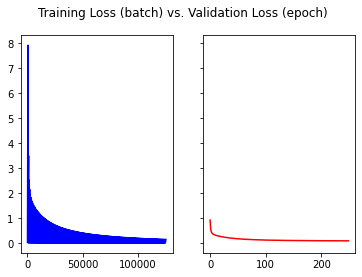

In [48]:
# 50k in train set, batch_size = 100 50k/100 = 500 iterations

print(f'using model {model} with optimizer {optimizerL2} and criterion {criterion}')
n_epochs = 250

epoch_loss_capture = []
batch_loss_capture = []
valid_loss_capture = []
for e in range(n_epochs):
  train_loss = 0.0

  for data, labels in tqdm(trainLoader):
    if torch.cuda.is_available():
      data, labels = data.cuda(), labels.cuda()

    optimizerL2.zero_grad()
    target = model(data)
    loss = criterion(target, labels)
    loss.backward()
    optimizerL2.step()
    train_loss += loss.item()
    batch_loss_capture.append(train_loss / BATCH_SIZE)

  valid_loss = 0.0
  model.eval()
  for data, labels in validLoader:
    if torch.cuda.is_available():
        data, labels = data.cuda(), labels.cuda()
         
    # Forward Pass
    target = model(data)
    # Find the Loss
    loss = criterion(target,labels)
    # Calculate Loss
    valid_loss += loss.item()
  
  epoch_loss_capture.append(train_loss / len(trainLoader))
  valid_loss_capture.append(valid_loss / len(validLoader))
  print(f'epoch {e+1} \n Training Loss: {train_loss / len(trainLoader)}')
  print(f'Epoch {e+1} \n Validation Loss {valid_loss / len(validLoader)}')

print('\n')
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.suptitle('Training Loss (batch) vs. Validation Loss (epoch)')
ax1.plot(batch_loss_capture, color='blue')
ax2.plot(valid_loss_capture, color='red')

plt.show()

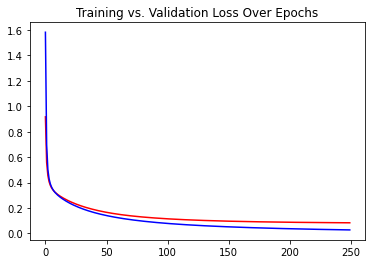

In [49]:
plt.title('Training vs. Validation Loss Over Epochs')
plt.plot(valid_loss_capture, color='red')
plt.plot(epoch_loss_capture, color='blue')
plt.show()

In [50]:
y_pred, y_true = predict_val(model, testLoader)
diffs = y_true - y_pred

In [51]:
100 - len([v for v in diffs if v != 0])/len(diffs)*100

97.93

In [52]:
pd.DataFrame(confusion_matrix(y_true, y_pred, labels=np.arange(0, 10)))

,0,1,2,3,4,5,6,7,8,9
0,969,0,1,1,1,2,1,1,2,2
1,0,1124,4,0,0,1,2,1,3,0
2,4,2,1008,5,3,0,2,4,4,0
3,0,0,3,996,0,1,0,3,3,4
4,1,0,1,1,960,0,4,2,2,11
5,3,1,0,8,1,867,4,1,4,3
6,5,3,1,1,2,3,940,1,2,0
7,0,5,9,4,0,0,0,1003,1,6
8,5,1,4,4,3,2,6,3,945,1
9,2,4,0,6,9,1,1,4,1,981


It appears that we obtain a slight improvement in accruacy by using the L2 regularization. 

We can see that training the MNIST dataset on a basic neural net we can obtain pretty good results. Possible next steps include running a different architecture or using CNN.